In [275]:
import pandas as pd
import numpy as np
# Load the CSV file
df = pd.read_csv('clean1.csv')
df.shape

(6054, 120)

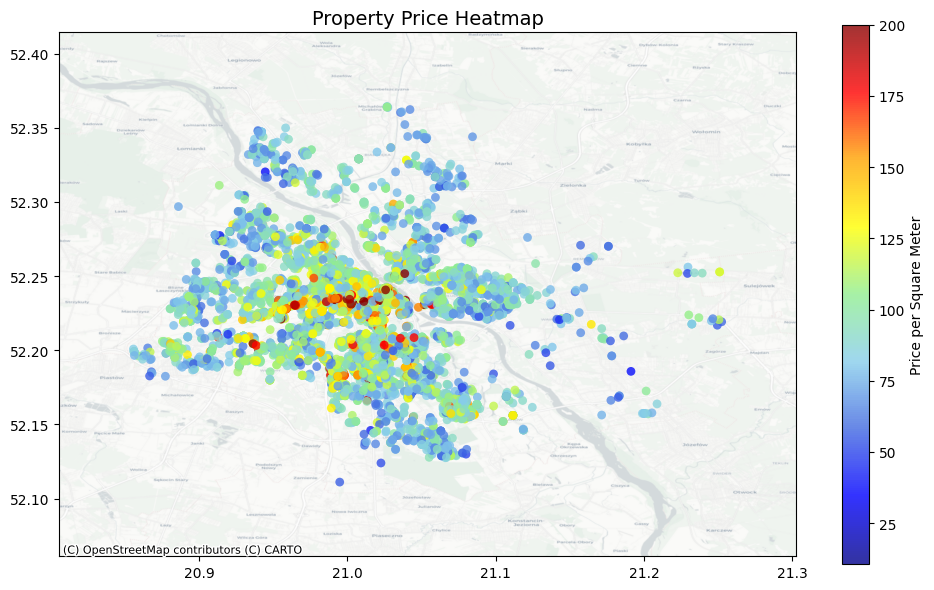

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Clean data
df_clean = df.dropna(subset=['latitude', 'longitude', 'price_per_sqm'])

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create custom colormap
colors = ['darkblue', 'blue', 'royalblue', 'skyblue', 'lightgreen', 'yellow', 'orange', 'red', 'darkred']
cmap = LinearSegmentedColormap.from_list('price_heatmap', colors)

# Set normalization with max at 200
norm = Normalize(vmin=df_clean['price_per_sqm'].min(), vmax=200)

# Create scatter plot
scatter = ax.scatter(
    df_clean['longitude'], 
    df_clean['latitude'],
    c=df_clean['price_per_sqm'],
    s=40,
    alpha=0.8,
    cmap=cmap,
    norm=norm,
    edgecolors='none',
    zorder=2
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.7)
cbar.set_label('Price per Square Meter')

# Set limits with buffer
buffer = 0.05
ax.set_xlim(df_clean['longitude'].min() - buffer, df_clean['longitude'].max() + buffer)
ax.set_ylim(df_clean['latitude'].min() - buffer, df_clean['latitude'].max() + buffer)

# Add title
plt.title('Property Price Heatmap', fontsize=14)

# Explicitly set the axes to use PlateCarree projection
ax.set_aspect('equal')

# Try to add a basemap with explicit zoom level
try:
    # Set explicit source and zoom level
    ctx.add_basemap(
        ax, 
        source=ctx.providers.CartoDB.Positron,
        zoom=12,  # Explicitly set zoom (adjust as needed: 10-15 are typical city-level zooms)
        crs="EPSG:4326"  # Standard geographic coordinates
    )
except Exception as e:
    print(f"Error with CartoDB: {e}")
    try:
        # Try another provider with explicit zoom
        ctx.add_basemap(
            ax, 
            source=ctx.providers.OpenStreetMap.Mapnik,
            zoom=12,
            crs="EPSG:4326"
        )
    except Exception as e:
        print(f"Error with OSM: {e}")
        ax.set_facecolor('#F2F2F2')
        ax.grid(alpha=0.3, zorder=0)
        print("Using simple background instead.")

# Show plot
plt.tight_layout()
plt.show()

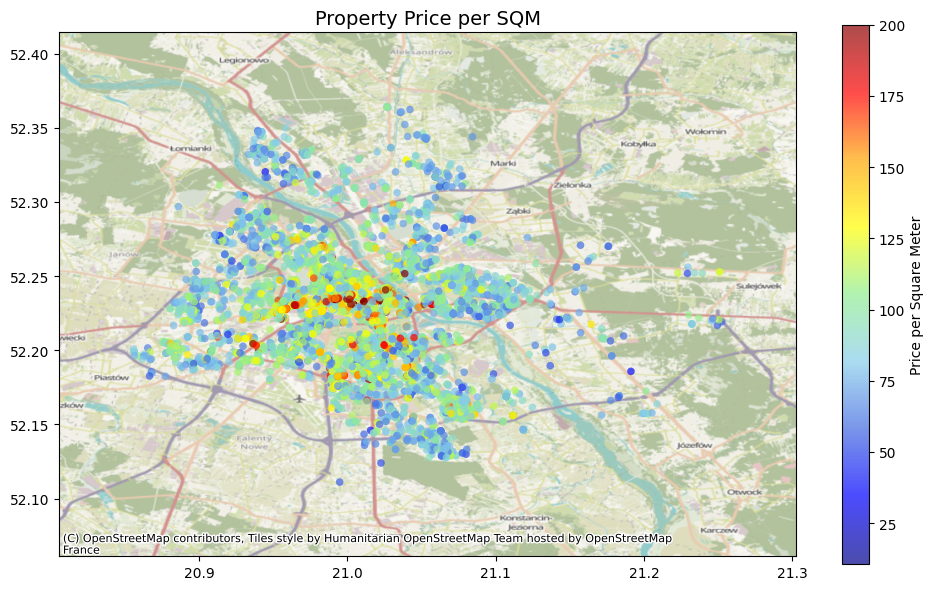

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Clean data
df_clean = df.dropna(subset=['latitude', 'longitude', 'price_per_sqm'])

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create custom colormap
colors = ['darkblue', 'blue', 'royalblue', 'skyblue', 'lightgreen', 'yellow', 'orange', 'red', 'darkred']
cmap = LinearSegmentedColormap.from_list('price_heatmap', colors)

# Set normalization with max at 200
norm = Normalize(vmin=df_clean['price_per_sqm'].min(), vmax=200)

# Create scatter plot
scatter = ax.scatter(
    df_clean['longitude'], 
    df_clean['latitude'],
    c=df_clean['price_per_sqm'],
    s=30,  # Slightly smaller points to see boundaries better
    alpha=0.7,
    cmap=cmap,
    norm=norm,
    edgecolors='none',
    zorder=2
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.7)
cbar.set_label('Price per Square Meter')

# Set limits with buffer
buffer = 0.05
ax.set_xlim(df_clean['longitude'].min() - buffer, df_clean['longitude'].max() + buffer)
ax.set_ylim(df_clean['latitude'].min() - buffer, df_clean['latitude'].max() + buffer)

# Add title
plt.title('Property Price Heatmap - Administrative map', fontsize=14)

# Explicitly set the axes to use PlateCarree projection
ax.set_aspect('equal')

# Try different administrative map providers
try:
    # Option 1: OpenStreetMap with more administrative boundaries
    ctx.add_basemap(
        ax, 
        source=ctx.providers.OpenStreetMap.HOT,  # Humanitarian style with clear admin boundaries
        zoom=11,
        crs="EPSG:4326"
    )
except Exception as e:
    print(f"Error with OSM HOT: {e}")
    try:
        # Option 2: Stamen Toner with administrative boundaries
        ctx.add_basemap(
            ax, 
            source=ctx.providers.Stamen.TonerLite,  # Clear boundaries
            zoom=11,
            crs="EPSG:4326"
        )
    except Exception as e:
        print(f"Error with Stamen Toner: {e}")
        try:
            # Option 3: CartoDB Positron with administrative boundaries
            ctx.add_basemap(
                ax, 
                source=ctx.providers.CartoDB.PositronOnlyLabels,  # Just the labels and boundaries
                zoom=11,
                crs="EPSG:4326"
            )
        except Exception as e:
            print(f"Error with CartoDB: {e}")
            # Fallback to basic map
            ctx.add_basemap(
                ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,
                zoom=11,
                crs="EPSG:4326"
            )
plt.title('Property Price per SQM', fontsize=14)
# Show plot
plt.tight_layout()
plt.show()

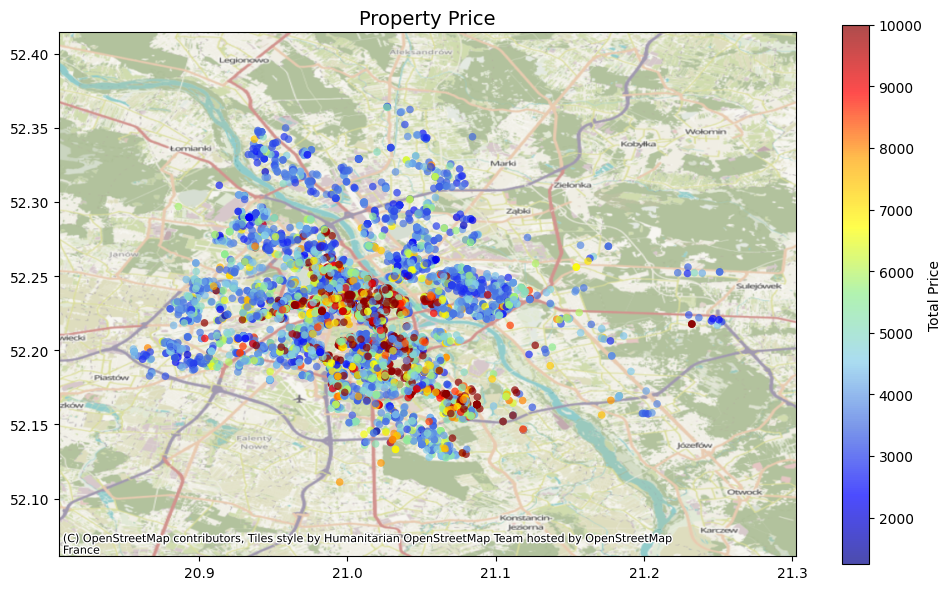

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Clean data
df_clean = df.dropna(subset=['latitude', 'longitude', 'total_price'])

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create custom colormap
colors = ['darkblue', 'blue', 'royalblue', 'skyblue', 'lightgreen', 'yellow', 'orange', 'red', 'darkred']
cmap = LinearSegmentedColormap.from_list('price_heatmap', colors)

# Set normalization with max at 12000
norm = Normalize(vmin=df_clean['total_price'].min(), vmax=10000)

# Create scatter plot
scatter = ax.scatter(
    df_clean['longitude'], 
    df_clean['latitude'],
    c=df_clean['total_price'],
    s=30,  # Slightly smaller points to see boundaries better
    alpha=0.7,
    cmap=cmap,
    norm=norm,
    edgecolors='none',
    zorder=2
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.7)
cbar.set_label('Total Price')

# Set limits with buffer
buffer = 0.05
ax.set_xlim(df_clean['longitude'].min() - buffer, df_clean['longitude'].max() + buffer)
ax.set_ylim(df_clean['latitude'].min() - buffer, df_clean['latitude'].max() + buffer)

# Add title
plt.title('Property Price', fontsize=14)

# Explicitly set the axes to use PlateCarree projection
ax.set_aspect('equal')

# Try different administrative map providers
try:
    # Option 1: OpenStreetMap with more administrative boundaries
    ctx.add_basemap(
        ax, 
        source=ctx.providers.OpenStreetMap.HOT,  # Humanitarian style with clear admin boundaries
        zoom=11,
        crs="EPSG:4326"
    )
except Exception as e:
    print(f"Error with OSM HOT: {e}")
    try:
        # Option 2: Stamen Toner with administrative boundaries
        ctx.add_basemap(
            ax, 
            source=ctx.providers.Stamen.TonerLite,  # Clear boundaries
            zoom=11,
            crs="EPSG:4326"
        )
    except Exception as e:
        print(f"Error with Stamen Toner: {e}")
        try:
            # Option 3: CartoDB Positron with administrative boundaries
            ctx.add_basemap(
                ax, 
                source=ctx.providers.CartoDB.PositronOnlyLabels,  # Just the labels and boundaries
                zoom=11,
                crs="EPSG:4326"
            )
        except Exception as e:
            print(f"Error with CartoDB: {e}")
            # Fallback to basic map
            ctx.add_basemap(
                ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,
                zoom=11,
                crs="EPSG:4326"
            )

# Show plot
plt.tight_layout()
plt.show()

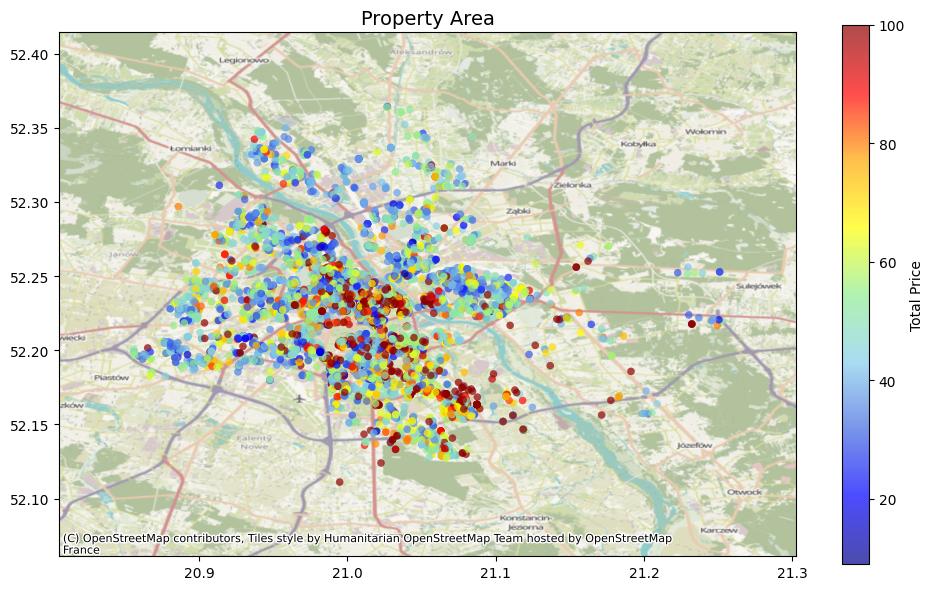

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Clean data
df_clean = df.dropna(subset=['latitude', 'longitude', 'area'])

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create custom colormap
colors = ['darkblue', 'blue', 'royalblue', 'skyblue', 'lightgreen', 'yellow', 'orange', 'red', 'darkred']
cmap = LinearSegmentedColormap.from_list('price_heatmap', colors)

# Set normalization with max at 12000
norm = Normalize(vmin=df_clean['area'].min(), vmax=100)

# Create scatter plot
scatter = ax.scatter(
    df_clean['longitude'], 
    df_clean['latitude'],
    c=df_clean['area'],
    s=30,  # Slightly smaller points to see boundaries better
    alpha=0.7,
    cmap=cmap,
    norm=norm,
    edgecolors='none',
    zorder=2
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.7)
cbar.set_label('Total Price')

# Set limits with buffer
buffer = 0.05
ax.set_xlim(df_clean['longitude'].min() - buffer, df_clean['longitude'].max() + buffer)
ax.set_ylim(df_clean['latitude'].min() - buffer, df_clean['latitude'].max() + buffer)

# Add title
plt.title('Property Area', fontsize=14)

# Explicitly set the axes to use PlateCarree projection
ax.set_aspect('equal')

# Try different administrative map providers
try:
    # Option 1: OpenStreetMap with more administrative boundaries
    ctx.add_basemap(
        ax, 
        source=ctx.providers.OpenStreetMap.HOT,  # Humanitarian style with clear admin boundaries
        zoom=11,
        crs="EPSG:4326"
    )
except Exception as e:
    print(f"Error with OSM HOT: {e}")
    try:
        # Option 2: Stamen Toner with administrative boundaries
        ctx.add_basemap(
            ax, 
            source=ctx.providers.Stamen.TonerLite,  # Clear boundaries
            zoom=11,
            crs="EPSG:4326"
        )
    except Exception as e:
        print(f"Error with Stamen Toner: {e}")
        try:
            # Option 3: CartoDB Positron with administrative boundaries
            ctx.add_basemap(
                ax, 
                source=ctx.providers.CartoDB.PositronOnlyLabels,  # Just the labels and boundaries
                zoom=11,
                crs="EPSG:4326"
            )
        except Exception as e:
            print(f"Error with CartoDB: {e}")
            # Fallback to basic map
            ctx.add_basemap(
                ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,
                zoom=11,
                crs="EPSG:4326"
            )

# Show plot
plt.tight_layout()
plt.show()

In [280]:
# Create a new column for the combined heating types (binary)
int64_columns =[]
df['heating_combined_other'] = (df['heating_Other'] | 
                               df['heating_electrical'] | 
                               df['heating_gas_heating']).astype(int)

# Check the distribution of the new binary column
zeros = (df['heating_combined_other'] == 0).sum()
ones = (df['heating_combined_other'] == 1).sum()
percent_ones = ones / len(df) * 100

print(f"heating_combined_other distribution:")
print(f"0 count: {zeros}")
print(f"1 count: {ones}")
print(f"% of 1s: {percent_ones:.2f}%")

# Update the heating_standardized column
# Map all non-urban values to 'Other'
df['heating_standardized'] = df['heating_standardized'].apply(
    lambda x: 'urban' if x == 'urban' else 'Other'
)

# Verify the updated heating_standardized values
print("\nUpdated unique values in heating_standardized:")
print(df['heating_standardized'].value_counts())
print(df['heating_standardized'].value_counts(normalize=True) * 100)

# Find the position of heating_urban in the DataFrame
if 'heating_urban' in df.columns:
    urban_position = list(df.columns).index('heating_urban')
    print(f"\nThe heating_urban column is at position {urban_position}")
else:
    print("\nheating_urban column not found")
    urban_position = None

# Get all column names
all_columns = list(df.columns)

# Reorder columns to place heating_combined_other right after heating_urban
if urban_position is not None:
    # Remove heating_combined_other from its current position if it exists
    if 'heating_combined_other' in all_columns:
        all_columns.remove('heating_combined_other')
    
    # Insert heating_combined_other after heating_urban
    all_columns.insert(urban_position + 1, 'heating_combined_other')
    
    # Reorder the DataFrame
    df = df[all_columns]
    
    print("\nColumns reordered to place heating_combined_other after heating_urban")
else:
    print("\nCould not reorder columns because heating_urban was not found")

# Drop the original heating columns
columns_to_drop = ['heating_Other', 'heating_electrical', 'heating_gas_heating']
df = df.drop(columns_to_drop, axis=1)

# Print confirmation
print(f"\nDropped columns: {columns_to_drop}")
print(f"New dataframe shape: {df.shape}")

# Update the int64_columns list
for col in columns_to_drop:
    if col in int64_columns:
        int64_columns.remove(col)

# Make sure heating_combined_other is in the list
if 'heating_combined_other' not in int64_columns:
    int64_columns.append('heating_combined_other')

# Verify if the columns are now adjacent in the DataFrame
if 'heating_urban' in df.columns and 'heating_combined_other' in df.columns:
    urban_pos = list(df.columns).index('heating_urban')
    other_pos = list(df.columns).index('heating_combined_other')
    print(f"\nFinal positions: heating_urban at {urban_pos}, heating_combined_other at {other_pos}")
    if other_pos == urban_pos + 1:
        print("Success! The columns are adjacent.")
    else:
        print("Something went wrong with reordering.")

heating_combined_other distribution:
0 count: 4533
1 count: 1521
% of 1s: 25.12%

Updated unique values in heating_standardized:
heating_standardized
urban    4533
Other    1521
Name: count, dtype: int64
heating_standardized
urban    74.876115
Other    25.123885
Name: proportion, dtype: float64

The heating_urban column is at position 90

Columns reordered to place heating_combined_other after heating_urban

Dropped columns: ['heating_Other', 'heating_electrical', 'heating_gas_heating']
New dataframe shape: (6054, 118)

Final positions: heating_urban at 87, heating_combined_other at 88
Success! The columns are adjacent.


In [281]:
 #62   age_1900_1949                     5527 non-null   int64  
 #63   age_1950_1979                     5527 non-null   int64  
 #64   age_1980_1999                     5527 non-null   int64  
 #65   age_2000_2009                     5527 non-null   int64  
 #66   age_2010_2019                     5527 non-null   int64  
 #67   age_2020_plus                     5527 non-null   int64  
 #68   age_pre_1900                      5527 non-null   int64

int64_columns = ['age_1900_1949', 'age_1950_1979', 'age_1980_1999', 'age_2000_2009', 'age_2010_2019', 'age_2020_plus', 'age_pre_1900']


# Create a list to store the results
results = []

for col in int64_columns:
    # Check if the column exists in the dataframe and is binary (only 0 and 1)
    if col in df.columns:
        # For non-binary integer columns, we'll show distribution differently
        unique_vals = df[col].unique()
        if set(unique_vals).issubset({0, 1}):  # Only has 0s and 1s
            zeros = (df[col] == 0).sum()
            ones = (df[col] == 1).sum()
            percent_ones = ones / len(df) * 100
            results.append((col, zeros, ones, percent_ones))
        else:  # For non-binary columns (like scores)
            # Skip non-binary columns for sorting purposes
            print(f"{col:<40} Not binary - unique values: {sorted(unique_vals[:10])} {'...' if len(unique_vals) > 10 else ''}")
    else:
        print(f"{col:<40} Column not found in dataframe")

# Sort the results by the percentage of 1s (ascending)
sorted_results = sorted(results, key=lambda x: x[3])  # Removed reverse=True

# Print the sorted results
print(f"{'Column':<40} {'0 count':<10} {'1 count':<10} {'% of 1s':<10}")
print("-" * 70)

for col, zeros, ones, percent_ones in sorted_results:
    print(f"{col:<40} {zeros:<10} {ones:<10} {percent_ones:.2f}%")

Column                                   0 count    1 count    % of 1s   
----------------------------------------------------------------------
age_pre_1900                             6038       16         0.26%
age_1980_1999                            5812       242        4.00%
age_1900_1949                            5776       278        4.59%
age_1950_1979                            5374       680        11.23%
age_2000_2009                            5062       992        16.39%
age_2010_2019                            4918       1136       18.76%
age_2020_plus                            4702       1352       22.33%


In [282]:
# 1. Combine age_pre_1900 and age_1900_1949 into age_pre_1949
df['age_pre_1949'] = (df['age_pre_1900'] | df['age_1900_1949']).astype(int)

# Check distribution of the new column
zeros = (df['age_pre_1949'] == 0).sum()
ones = (df['age_pre_1949'] == 1).sum()
percent_ones = ones / len(df) * 100

print(f"age_pre_1949 distribution:")
print(f"0 count: {zeros}")
print(f"1 count: {ones}")
print(f"% of 1s: {percent_ones:.2f}%")

# 2. Calculate sum of age indicators to identify unknown ages
age_columns = ['age_pre_1900', 'age_1900_1949', 'age_1950_1979', 
              'age_1980_1999', 'age_2000_2009', 'age_2010_2019', 'age_2020_plus']

# Calculate sum of age indicators by row
df['age_indicators_sum'] = df[age_columns].sum(axis=1)

# 3. Create age_unknown column for rows with no age information
df['age_unknown'] = (df['age_indicators_sum'] == 0).astype(int)

# Check distribution of the age_unknown column
unknown_count = df['age_unknown'].sum()
print(f"\nRows with unknown age: {unknown_count} ({unknown_count/len(df)*100:.2f}%)")

# 4. Update or create build_age_group column
if 'build_age_group' in df.columns:
    # Update existing build_age_group
    df.loc[df['age_pre_1900'] == 1, 'build_age_group'] = 'pre_1949'
    df.loc[df['age_1900_1949'] == 1, 'build_age_group'] = 'pre_1949'
    df.loc[df['age_unknown'] == 1, 'build_age_group'] = 'unknown'
else:
    # Create new build_age_group column
    df['build_age_group'] = 'unknown'  # Default value
    
    # Assign values based on binary indicators
    df.loc[df['age_pre_1900'] == 1, 'build_age_group'] = 'pre_1949'
    df.loc[df['age_1900_1949'] == 1, 'build_age_group'] = 'pre_1949'
    df.loc[df['age_1950_1979'] == 1, 'build_age_group'] = '1950_1979'
    df.loc[df['age_1980_1999'] == 1, 'build_age_group'] = '1980_1999'
    df.loc[df['age_2000_2009'] == 1, 'build_age_group'] = '2000_2009'
    df.loc[df['age_2010_2019'] == 1, 'build_age_group'] = '2010_2019'
    df.loc[df['age_2020_plus'] == 1, 'build_age_group'] = '2020_plus'

# 5. Reorder columns to place age_pre_1949 after build_age_group
all_columns = list(df.columns)

# Remove new columns from their current positions
if 'age_pre_1949' in all_columns:
    all_columns.remove('age_pre_1949')
if 'age_unknown' in all_columns:
    all_columns.remove('age_unknown')

# Find positions for insertion
if 'build_age_group' in all_columns:
    build_age_group_pos = all_columns.index('build_age_group')
    all_columns.insert(build_age_group_pos + 1, 'age_pre_1949')
else:
    # If build_age_group doesn't exist, add age_pre_1949 to the end
    all_columns.append('age_pre_1949')

# Find position to insert age_unknown after age_2020_plus
if 'age_2020_plus' in all_columns:
    age_2020_plus_pos = all_columns.index('age_2020_plus')
    all_columns.insert(age_2020_plus_pos + 1, 'age_unknown')
else:
    # If age_2020_plus doesn't exist, add age_unknown near other age columns
    if 'age_pre_1949' in all_columns:
        age_pre_1949_pos = all_columns.index('age_pre_1949')
        all_columns.insert(age_pre_1949_pos + 1, 'age_unknown')
    else:
        all_columns.append('age_unknown')

# Reorder the DataFrame
df = df[all_columns]

# 6. Drop the old age columns and temporary column
columns_to_drop = ['age_pre_1900', 'age_1900_1949', 'age_indicators_sum']
df = df.drop(columns_to_drop, axis=1)

# Print confirmation
print(f"\nDropped columns: {columns_to_drop}")
print(f"New dataframe shape: {df.shape}")

# 7. Update the int64_columns list
for col in columns_to_drop:
    if col in int64_columns:
        int64_columns.remove(col)

# Add new columns to int64_columns
new_columns = ['age_pre_1949', 'age_unknown']
for col in new_columns:
    if col not in int64_columns:
        int64_columns.append(col)

print(f"\nUpdated int64_columns list now has {len(int64_columns)} columns")

# 8. Verify column positions
if 'build_age_group' in df.columns and 'age_pre_1949' in df.columns:
    build_age_group_pos = list(df.columns).index('build_age_group')
    age_pre_1949_pos = list(df.columns).index('age_pre_1949')
    print(f"\nPositions: build_age_group at {build_age_group_pos}, age_pre_1949 at {age_pre_1949_pos}")
    if age_pre_1949_pos == build_age_group_pos + 1:
        print("✓ age_pre_1949 is correctly positioned after build_age_group")
    else:
        print("✗ age_pre_1949 is not correctly positioned")

if 'age_2020_plus' in df.columns and 'age_unknown' in df.columns:
    age_2020_plus_pos = list(df.columns).index('age_2020_plus')
    age_unknown_pos = list(df.columns).index('age_unknown')
    print(f"Positions: age_2020_plus at {age_2020_plus_pos}, age_unknown at {age_unknown_pos}")
    if age_unknown_pos == age_2020_plus_pos + 1:
        print("✓ age_unknown is correctly positioned after age_2020_plus")
    else:
        print("✗ age_unknown is not correctly positioned")

# 9. Show final distribution of age columns
age_columns_final = ['age_pre_1949', 'age_1950_1979', 'age_1980_1999', 
                    'age_2000_2009', 'age_2010_2019', 'age_2020_plus', 'age_unknown']

print("\nFinal age columns distribution:")
for col in age_columns_final:
    if col in df.columns:
        ones = df[col].sum()
        percent = ones / len(df) * 100
        print(f"{col}: {ones} ({percent:.2f}%)")

age_pre_1949 distribution:
0 count: 5760
1 count: 294
% of 1s: 4.86%

Rows with unknown age: 1358 (22.43%)

Dropped columns: ['age_pre_1900', 'age_1900_1949', 'age_indicators_sum']
New dataframe shape: (6054, 118)

Updated int64_columns list now has 7 columns

Positions: build_age_group at 61, age_pre_1949 at 62
✓ age_pre_1949 is correctly positioned after build_age_group
Positions: age_2020_plus at 67, age_unknown at 68
✓ age_unknown is correctly positioned after age_2020_plus

Final age columns distribution:
age_pre_1949: 294 (4.86%)
age_1950_1979: 680 (11.23%)
age_1980_1999: 242 (4.00%)
age_2000_2009: 992 (16.39%)
age_2010_2019: 1136 (18.76%)
age_2020_plus: 1352 (22.33%)
age_unknown: 1358 (22.43%)


In [283]:
# Check if two_storey column exists
if 'two_storey' in df.columns:
    # Drop the two_storey column
    df = df.drop('two_storey', axis=1)
    print(f"Column 'two_storey' has been dropped")
    
    # Remove from int64_columns list if present
    if 'two_storey' in int64_columns:
        int64_columns.remove('two_storey')
        print(f"'two_storey' removed from int64_columns list")
    
    # Print new dataframe shape
    print(f"New dataframe shape: {df.shape}")
    print(f"Updated int64_columns list now has {len(int64_columns)} columns")
else:
    print("Column 'two_storey' not found in the dataframe")

Column 'two_storey' has been dropped
New dataframe shape: (6054, 117)
Updated int64_columns list now has 7 columns


In [284]:
# 1. Identify the districts to combine
districts_to_combine = ['district_Rembertów', 'district_Wesoła', 'district_Wawer', 'district_Unknown']

# Check if these columns exist
missing_columns = [col for col in districts_to_combine if col not in df.columns]
if missing_columns:
    print(f"Warning: These columns were not found in the dataframe: {missing_columns}")
    # Remove missing columns from our list
    districts_to_combine = [col for col in districts_to_combine if col in df.columns]

if not districts_to_combine:
    print("None of the specified district columns were found. No changes made.")
else:
    # 2. Create a new district_other column (combine the rare districts)
    df['district_other'] = df[districts_to_combine].max(axis=1)

    # 3. Check the distribution of the new column
    other_count = df['district_other'].sum()
    other_percent = other_count / len(df) * 100
    print(f"district_other distribution: {other_count} ({other_percent:.2f}%)")

    # 4. Update district_standardized
    # First check the current values
    print("\nCurrent district_standardized values:")
    print(df['district_standardized'].value_counts())

    # Now update the values
    for col in districts_to_combine:
        district_name = col.replace('district_', '')
        mask = df[col] == 1
        df.loc[mask, 'district_standardized'] = 'Other'

    # Check the updated values
    print("\nUpdated district_standardized values:")
    print(df['district_standardized'].value_counts())

    # 5. Reorder columns to place district_other after district_Żoliborz
    all_columns = list(df.columns)

    # Remove district_other from its current position if it exists
    if 'district_other' in all_columns:
        all_columns.remove('district_other')

    # Find position of district_Żoliborz for insertion
    if 'district_Żoliborz' in all_columns:
        zoliborz_pos = all_columns.index('district_Żoliborz')
        all_columns.insert(zoliborz_pos + 1, 'district_other')
    else:
        # If district_Żoliborz doesn't exist, add district_other near other district columns
        # Find any district column
        district_cols = [col for col in all_columns if col.startswith('district_')]
        if district_cols:
            last_district_pos = all_columns.index(district_cols[-1])
            all_columns.insert(last_district_pos + 1, 'district_other')
        else:
            all_columns.append('district_other')

    # Reorder the DataFrame
    df = df[all_columns]

    # 6. Drop the original district columns that were combined
    df = df.drop(districts_to_combine, axis=1)
    print(f"\nDropped columns: {districts_to_combine}")
    print(f"New dataframe shape: {df.shape}")

    # 7. Update the int64_columns list
    for col in districts_to_combine:
        if col in int64_columns:
            int64_columns.remove(col)

    # Add the new column to int64_columns
    if 'district_other' not in int64_columns:
        int64_columns.append('district_other')

    print(f"\nUpdated int64_columns list now has {len(int64_columns)} columns")

    # 8. Verify column positions
    if 'district_Żoliborz' in df.columns and 'district_other' in df.columns:
        zoliborz_pos = list(df.columns).index('district_Żoliborz')
        other_pos = list(df.columns).index('district_other')
        print(f"\nPositions: district_Żoliborz at {zoliborz_pos}, district_other at {other_pos}")
        if other_pos == zoliborz_pos + 1:
            print("✓ district_other is correctly positioned after district_Żoliborz")
        else:
            print("✗ district_other is not correctly positioned")

district_other distribution: 111 (1.83%)

Current district_standardized values:
district_standardized
Śródmieście       1123
Mokotów           1083
Wola               771
Praga-Południe     542
Wilanów            299
Other              275
Ursynów            257
Bemowo             220
Ochota             215
Białołęka          211
Bielany            190
Włochy             172
Żoliborz           161
Ursus              150
Targówek           141
Praga-Północ       133
Unknown             48
Wawer               44
Wesoła              11
Rembertów            8
Name: count, dtype: int64

Updated district_standardized values:
district_standardized
Śródmieście       1123
Mokotów           1083
Wola               771
Praga-Południe     542
Other              386
Wilanów            299
Ursynów            257
Bemowo             220
Ochota             215
Białołęka          211
Bielany            190
Włochy             172
Żoliborz           161
Ursus              150
Targówek           141
Praga-

In [285]:
 #79   window_Other                      5527 non-null   int64  
 #80   window_aluminium                  5527 non-null   int64  
 #81   window_plastic                    5527 non-null   int64  
 #82   window_wooden                     5527 non-null   int64  

int64_columns = ['window_Other', 'window_aluminium', 'window_plastic', 'window_wooden']


# Create a list to store the results
results = []

for col in int64_columns:
    # Check if the column exists in the dataframe and is binary (only 0 and 1)
    if col in df.columns:
        # For non-binary integer columns, we'll show distribution differently
        unique_vals = df[col].unique()
        if set(unique_vals).issubset({0, 1}):  # Only has 0s and 1s
            zeros = (df[col] == 0).sum()
            ones = (df[col] == 1).sum()
            percent_ones = ones / len(df) * 100
            results.append((col, zeros, ones, percent_ones))
        else:  # For non-binary columns (like scores)
            # Skip non-binary columns for sorting purposes
            print(f"{col:<40} Not binary - unique values: {sorted(unique_vals[:10])} {'...' if len(unique_vals) > 10 else ''}")
    else:
        print(f"{col:<40} Column not found in dataframe")

# Sort the results by the percentage of 1s (ascending)
sorted_results = sorted(results, key=lambda x: x[3])  # Removed reverse=True

# Print the sorted results
print(f"{'Column':<40} {'0 count':<10} {'1 count':<10} {'% of 1s':<10}")
print("-" * 70)

for col, zeros, ones, percent_ones in sorted_results:
    print(f"{col:<40} {zeros:<10} {ones:<10} {percent_ones:.2f}%")

Column                                   0 count    1 count    % of 1s   
----------------------------------------------------------------------
window_aluminium                         5975       79         1.30%
window_wooden                            5228       826        13.64%
window_plastic                           3519       2535       41.87%
window_Other                             3440       2614       43.18%


In [286]:
# 1. Check if both columns exist
if 'window_aluminium' in df.columns and 'window_Other' in df.columns:
    # Check initial distributions
    print("Initial distributions:")
    print(f"window_aluminium: {df['window_aluminium'].sum()} ({df['window_aluminium'].sum()/len(df)*100:.2f}%)")
    print(f"window_Other: {df['window_Other'].sum()} ({df['window_Other'].sum()/len(df)*100:.2f}%)")
    
    # 2. Update window_Other to include window_aluminium entries
    # This is a logical OR operation (if either is 1, the result is 1)
    df['window_Other'] = (df['window_Other'] | df['window_aluminium']).astype(int)
    
    # 3. Check the new distribution of window_Other
    other_count = df['window_Other'].sum()
    other_percent = other_count / len(df) * 100
    print(f"\nUpdated window_Other distribution: {other_count} ({other_percent:.2f}%)")
    
    # 4. Update windows_type_standardized
    # First check current values
    if 'windows_type_standardized' in df.columns:
        print("\nCurrent windows_type_standardized values:")
        print(df['windows_type_standardized'].value_counts())
        
        # Update values - set all aluminium windows to 'Other'
        aluminium_mask = df['window_aluminium'] == 1
        df.loc[aluminium_mask, 'windows_type_standardized'] = 'Other'
        
        # Check updated values
        print("\nUpdated windows_type_standardized values:")
        print(df['windows_type_standardized'].value_counts())
    else:
        print("\nNote: windows_type_standardized column not found in dataframe")
    
    # 5. Drop the window_aluminium column
    df = df.drop('window_aluminium', axis=1)
    print(f"\nDropped column: window_aluminium")
    print(f"New dataframe shape: {df.shape}")
    
    # 6. Update the int64_columns list
    if 'window_aluminium' in int64_columns:
        int64_columns.remove('window_aluminium')
        print(f"\nRemoved window_aluminium from int64_columns list")
        print(f"Updated int64_columns list now has {len(int64_columns)} columns")
else:
    print("One or both of the window columns not found in the dataframe")
    if 'window_aluminium' not in df.columns:
        print("window_aluminium column not found")
    if 'window_Other' not in df.columns:
        print("window_Other column not found")

Initial distributions:
window_aluminium: 79 (1.30%)
window_Other: 2614 (43.18%)

Updated window_Other distribution: 2693 (44.48%)

Current windows_type_standardized values:
windows_type_standardized
Other        2614
plastic      2535
wooden        826
aluminium      79
Name: count, dtype: int64

Updated windows_type_standardized values:
windows_type_standardized
Other      2693
plastic    2535
wooden      826
Name: count, dtype: int64

Dropped column: window_aluminium
New dataframe shape: (6054, 113)

Removed window_aluminium from int64_columns list
Updated int64_columns list now has 3 columns


In [287]:
int64_columns = df.select_dtypes(include=['int64']).columns.tolist()

int64_columns.remove('rooms_num')
# Create a list to store the results
results = []

for col in int64_columns:
    # Check if the column exists in the dataframe and is binary (only 0 and 1)
    if col in df.columns:
        # For non-binary integer columns, we'll show distribution differently
        unique_vals = df[col].unique()
        if set(unique_vals).issubset({0, 1}):  # Only has 0s and 1s
            zeros = (df[col] == 0).sum()
            ones = (df[col] == 1).sum()
            percent_ones = ones / len(df) * 100
            results.append((col, zeros, ones, percent_ones))
        else:  # For non-binary columns (like scores)
            # Skip non-binary columns for sorting purposes
            print(f"{col:<40} Not binary - unique values: {sorted(unique_vals[:10])} {'...' if len(unique_vals) > 10 else ''}")
    else:
        print(f"{col:<40} Column not found in dataframe")

# Sort the results by the percentage of 1s (ascending)
sorted_results = sorted(results, key=lambda x: x[3])  # Removed reverse=True

# Print the sorted results
print(f"{'Column':<40} {'0 count':<10} {'1 count':<10} {'% of 1s':<10}")
print("-" * 70)

for col, zeros, ones, percent_ones in sorted_results:
    print(f"{col:<40} {zeros:<10} {ones:<10} {percent_ones:.2f}%")

Column                                   0 count    1 count    % of 1s   
----------------------------------------------------------------------
floor_Special                            5965       89         1.47%
district_other                           5943       111        1.83%
district_Praga-Północ                    5921       133        2.20%
district_Targówek                        5913       141        2.33%
size_Huge                                5907       147        2.43%
district_Ursus                           5904       150        2.48%
many_rooms                               5898       156        2.58%
material_concrete                        5895       159        2.63%
district_Żoliborz                        5893       161        2.66%
district_Włochy                          5882       172        2.84%
district_Bielany                         5864       190        3.14%
district_Białołęka                       5843       211        3.49%
district_Ochota            

In [288]:
# Simple correlation analysis to find the top 30 highly correlated feature pairs
import pandas as pd
import numpy as np
from IPython.display import display

# Calculate the correlation matrix from the current dataframe
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangle to avoid duplicates and self-correlations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Get the correlations excluding self-correlations
high_corr_pairs = correlation_matrix.abs().where(~mask).stack().sort_values(ascending=False)

# Display top 30 correlated pairs
print("Top 30 highly correlated feature pairs (potential redundancy):")
display(high_corr_pairs.head(30))




Top 30 highly correlated feature pairs (potential redundancy):


user_type_private_owner    user_type_agency           1.000000
heating_combined_other     heating_urban              1.000000
construction_ready_to_use  construction_Other         1.000000
material_brick             material_Other             0.856098
rooms_num                  area                       0.824685
oven                       fridge                     0.815471
washing_machine            fridge                     0.808619
total_price                area                       0.801639
floor_numeric              floor_VeryHigh             0.785724
price_per_room             price_per_sqm              0.765665
                           total_price                0.761363
window_plastic             window_Other               0.759737
height_skyscraper          building_floors_num        0.735197
fridge                     dishwasher                 0.699044
washing_machine            oven                       0.693314
age_pre_1949               build_year                 0

In [289]:
# 1. Remove perfectly correlated opposite pairs
columns_to_drop = ['construction_Other', 'heating_combined_other', 'user_type_private_owner']

# 2. Remove highly correlated material features
columns_to_drop.append('material_Other')



# 8. Drop the identified columns
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
print(f"Dropping {len(columns_to_drop)} redundant columns: {columns_to_drop}")
df = df.drop(columns=columns_to_drop)

print(f"New dataframe shape: {df.shape}")


Dropping 4 redundant columns: ['construction_Other', 'heating_combined_other', 'user_type_private_owner', 'material_Other']
New dataframe shape: (6054, 109)


In [290]:
# Simple correlation analysis to find the top 30 highly correlated feature pairs
import pandas as pd
import numpy as np
from IPython.display import display

# Calculate the correlation matrix from the current dataframe
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangle to avoid duplicates and self-correlations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Get the correlations excluding self-correlations
high_corr_pairs = correlation_matrix.abs().where(~mask).stack().sort_values(ascending=False)

# Display top 30 correlated pairs
print("Top 30 highly correlated feature pairs (potential redundancy):")
display(high_corr_pairs.head(30))


Top 30 highly correlated feature pairs (potential redundancy):


rooms_num                area                       0.824685
oven                     fridge                     0.815471
washing_machine          fridge                     0.808619
total_price              area                       0.801639
floor_numeric            floor_VeryHigh             0.785724
price_per_room           price_per_sqm              0.765665
                         total_price                0.761363
window_plastic           window_Other               0.759737
height_skyscraper        building_floors_num        0.735197
fridge                   dishwasher                 0.699044
washing_machine          oven                       0.693314
age_pre_1949             build_year                 0.692110
internet                 cable-television           0.690509
oven                     dishwasher                 0.685516
height_mid_rise          height_high_rise           0.656733
stove                    fridge                     0.628540
total_price             

In [291]:
# Find the row with the specific URL
url = "https://www.otodom.pl/pl/oferta/mieszkanie-do-wynajecia-warszawa-ul-bruna-metro-ID4t9d3"
specific_row = df[df['url'] == url]

# Display the rent value for this URL
if not specific_row.empty:
    rent_value = specific_row['total_price'].values[0]
    print(f"Rent for the property at {url}: {rent_value}")
else:
    print(f"No property found with URL: {url}")

Rent for the property at https://www.otodom.pl/pl/oferta/mieszkanie-do-wynajecia-warszawa-ul-bruna-metro-ID4t9d3: 6306.89


Price statistics:
count     6054.000000
mean      6290.730487
std       4882.566989
min       1250.000000
1%        2481.540000
5%        2911.300000
10%       3200.000000
25%       3741.250000
50%       4636.500000
75%       6800.000000
90%      11004.000000
95%      15500.000000
99%      30000.000000
max      57000.000000
Name: total_price, dtype: float64

Outlier thresholds (1.5 IQR method):
Lower bound: -846.88
Upper bound: 11388.12

Number of outliers: 595 (9.83% of the data)
Outlier range: 1250.00 to -846.88 and 11388.12 to 57000.00


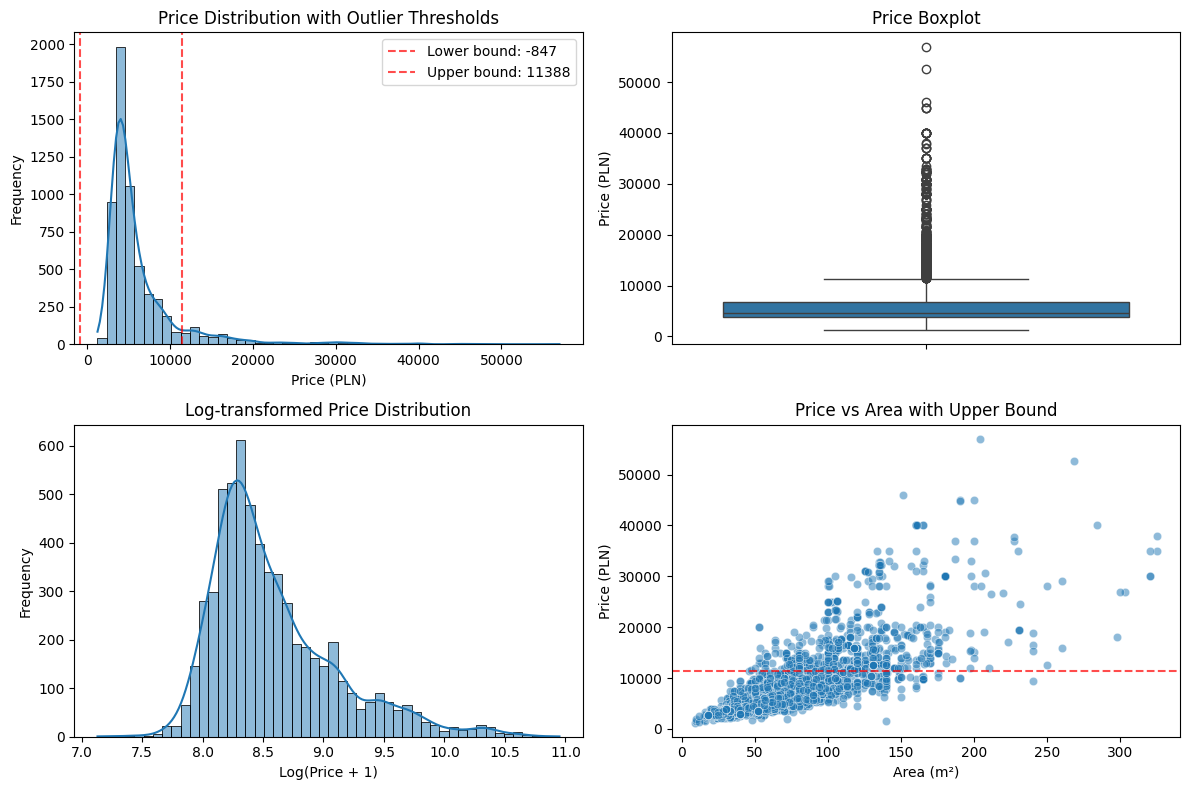


Top 10 highest price outliers:


total_price  \
817       57000.0   
927       52600.0   
4009      46000.0   
5723      45000.0   
1158      45000.0   
4254      44850.0   
2162      40000.0   
2557      40000.0   
1259      40000.0   
5900      40000.0   

                                                                                           url  \
817   https://www.otodom.pl/pl/oferta/unique-apartment-204-sqm-at-51-floor-on-zlota-44-ID4wZVe   
927             https://www.otodom.pl/pl/oferta/wyjatkowy-penthouse-z-tarasem-na-dachu-ID4uxP5   
4009                     https://www.otodom.pl/pl/oferta/luksusowy-apartament-zlota-44-ID4wngf   
5723                                  https://www.otodom.pl/pl/oferta/foksal-penthouse-ID4uz6K   
1158    https://www.otodom.pl/pl/oferta/penthousefoksalwysoki-standardprestizluksusowy-ID4vfcU   
4254    https://www.otodom.pl/pl/oferta/penthousefoksalwysoki-standardprestizluksusowy-ID4v10c   
2162       https://www.otodom.pl/pl/oferta/cosmopolitan-dostep-do-kazdego-lokalu-0-fee-ID4vdoi   
2557     https://www.otodom.pl/pl/oferta/zlota-44-160-m2-3-sypialnie-master-3-lazienki-ID4wWZg   
1259       https://www.otodom.pl/pl/oferta/spectacular-3-bedroom-apartment-on-zlota-44-ID4u14J   
5900                   https://www.otodom.pl/pl/oferta/3bdm-on-zlota44-amazing-sunsets-ID4smKm   

       area  rooms_num district_standardized  
817   204.0          4           Śródmieście  
927   268.0          5           Śródmieście  
4009  151.0          4           Śródmieście  
5723  200.0          5           Śródmieście  
1158  190.0          5           Śródmieście  
4254  190.0          5           Śródmieście  
2162  165.0          4           Śródmieście  
2557  160.0          4           Śródmieście  
1259  160.0          4           Śródmieście  
5900  161.0          4           Śródmieście


Outlier characteristics vs. non-outliers:

Numeric feature comparison:


Outliers Mean  Non-outliers Mean     Ratio
area          127.728202          52.898767  2.414578
rooms_num       3.786555           2.243634  1.687688


District distribution of outliers:


Outliers (%)  Normal (%)
district_standardized                          
Śródmieście               51.428571   14.966111
Mokotów                   21.680672   17.475728
Wola                      10.588235   12.969408
Wilanów                    9.243697    4.469683
Praga-Południe             2.016807    9.708738
Other                      1.512605    6.906027
Żoliborz                   1.512605    2.784393
Praga-Północ               0.840336    2.344752
Ursynów                    0.504202    4.652867
Ochota                     0.336134    3.901814


Original vs. capped price statistics:


Original        Capped
count   6054.000000   6054.000000
mean    6290.730487   5624.171910
std     4882.566989   2619.102853
min     1250.000000   1250.000000
25%     3741.250000   3741.250000
50%     4636.500000   4636.500000
75%     6800.000000   6800.000000
max    57000.000000  11388.125000


Outliers based on Z-score > 3: 130 (2.15% of the data)


In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_info_columns', 10000)  # Ensures no cutoff in df.info()

# 1. Basic statistics and visualization of the price distribution
target_col = 'total_price'

if target_col not in df.columns:
    print(f"Error: Target column '{target_col}' not found in dataframe")
else:
    # Basic statistics
    price_stats = df[target_col].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
    print("Price statistics:")
    print(price_stats)
    
    # Calculate IQR (Interquartile Range)
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nOutlier thresholds (1.5 IQR method):")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    
    # Identify outliers
    outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
    outliers_count = len(outliers)
    outliers_percent = outliers_count / len(df) * 100
    
    print(f"\nNumber of outliers: {outliers_count} ({outliers_percent:.2f}% of the data)")
    print(f"Outlier range: {df[target_col].min():.2f} to {lower_bound:.2f} and {upper_bound:.2f} to {df[target_col].max():.2f}")
    
    # 2. Visualize the price distribution
    plt.figure(figsize=(12, 8))
    
    # Create subplot grid (2 rows, 2 columns)
    plt.subplot(2, 2, 1)
    sns.histplot(df[target_col], kde=True, bins=50)
    plt.axvline(x=lower_bound, color='r', linestyle='--', alpha=0.7, label=f'Lower bound: {lower_bound:.0f}')
    plt.axvline(x=upper_bound, color='r', linestyle='--', alpha=0.7, label=f'Upper bound: {upper_bound:.0f}')
    plt.title('Price Distribution with Outlier Thresholds')
    plt.xlabel('Price (PLN)')
    plt.ylabel('Frequency')
    plt.legend()
    
    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(y=df[target_col])
    plt.title('Price Boxplot')
    plt.ylabel('Price (PLN)')
    
    # Log-transformed price distribution
    plt.subplot(2, 2, 3)
    sns.histplot(np.log1p(df[target_col]), kde=True, bins=50)
    plt.title('Log-transformed Price Distribution')
    plt.xlabel('Log(Price + 1)')
    plt.ylabel('Frequency')
    
    # Price vs area scatter plot to identify outliers
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='area', y=target_col, data=df, alpha=0.5)
    plt.axhline(y=upper_bound, color='r', linestyle='--', alpha=0.7)
    plt.title('Price vs Area with Upper Bound')
    plt.xlabel('Area (m²)')
    plt.ylabel('Price (PLN)')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Examine the outliers in more detail
    if outliers_count > 0:
        # Sort outliers by price (descending)
        high_outliers = outliers[outliers[target_col] > upper_bound].sort_values(by=target_col, ascending=False)
        low_outliers = outliers[outliers[target_col] < lower_bound].sort_values(by=target_col)
        
        print("\nTop 10 highest price outliers:")
        top_columns = [target_col, 'url', 'area', 'rooms_num', 'district_standardized']
        display_columns = [col for col in top_columns if col in high_outliers.columns]
        display(high_outliers[display_columns].head(10))
        
        if len(low_outliers) > 0:
            print("\nBottom 10 lowest price outliers:")
            display(low_outliers[display_columns].head(10))
        
        # Analyze outlier characteristics
        print("\nOutlier characteristics vs. non-outliers:")
        non_outliers = df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]
        
        # Compare key numeric features
        numeric_cols = ['area', 'rooms_num']
        numeric_cols = [col for col in numeric_cols if col in df.columns]
        
        if numeric_cols:
            outlier_stats = outliers[numeric_cols].mean()
            non_outlier_stats = non_outliers[numeric_cols].mean()
            
            comparison = pd.DataFrame({
                'Outliers Mean': outlier_stats,
                'Non-outliers Mean': non_outlier_stats,
                'Ratio': outlier_stats / non_outlier_stats
            })
            
            print("\nNumeric feature comparison:")
            display(comparison)
        
        # Check district distribution of outliers
        if 'district_standardized' in df.columns:
            print("\nDistrict distribution of outliers:")
            outlier_districts = outliers['district_standardized'].value_counts(normalize=True) * 100
            normal_districts = non_outliers['district_standardized'].value_counts(normalize=True) * 100
            
            district_comparison = pd.DataFrame({
                'Outliers (%)': outlier_districts,
                'Normal (%)': normal_districts
            }).fillna(0).sort_values('Outliers (%)', ascending=False)
            
            display(district_comparison.head(10))
    
    # 4. Create a price version with outliers capped
    df['total_price_capped'] = df[target_col].clip(lower=lower_bound, upper=upper_bound)
    
    # Compare original vs capped
    print("\nOriginal vs. capped price statistics:")
    capped_comparison = pd.DataFrame({
        'Original': df[target_col].describe(),
        'Capped': df['total_price_capped'].describe()
    })
    display(capped_comparison)
    
    # 5. Z-score analysis (another way to detect outliers)
    z_scores = stats.zscore(df[target_col])
    z_outliers = np.abs(z_scores) > 3
    z_outliers_count = z_outliers.sum()
    z_outliers_percent = z_outliers_count / len(df) * 100
    
    print(f"\nOutliers based on Z-score > 3: {z_outliers_count} ({z_outliers_percent:.2f}% of the data)")

Outlier analysis with corrected data:
Q1 (25th percentile): 3741.25
Q3 (75th percentile): 6800.00
IQR: 3058.75

Outlier thresholds (1.5 IQR method):
Calculated lower bound: -846.88 (invalid for prices)
Adjusted lower bound: 1000.00
Upper bound: 11388.12

Number of high price outliers: 595 (9.83% of the data)
High outlier range: 11388.12 to 57000.00


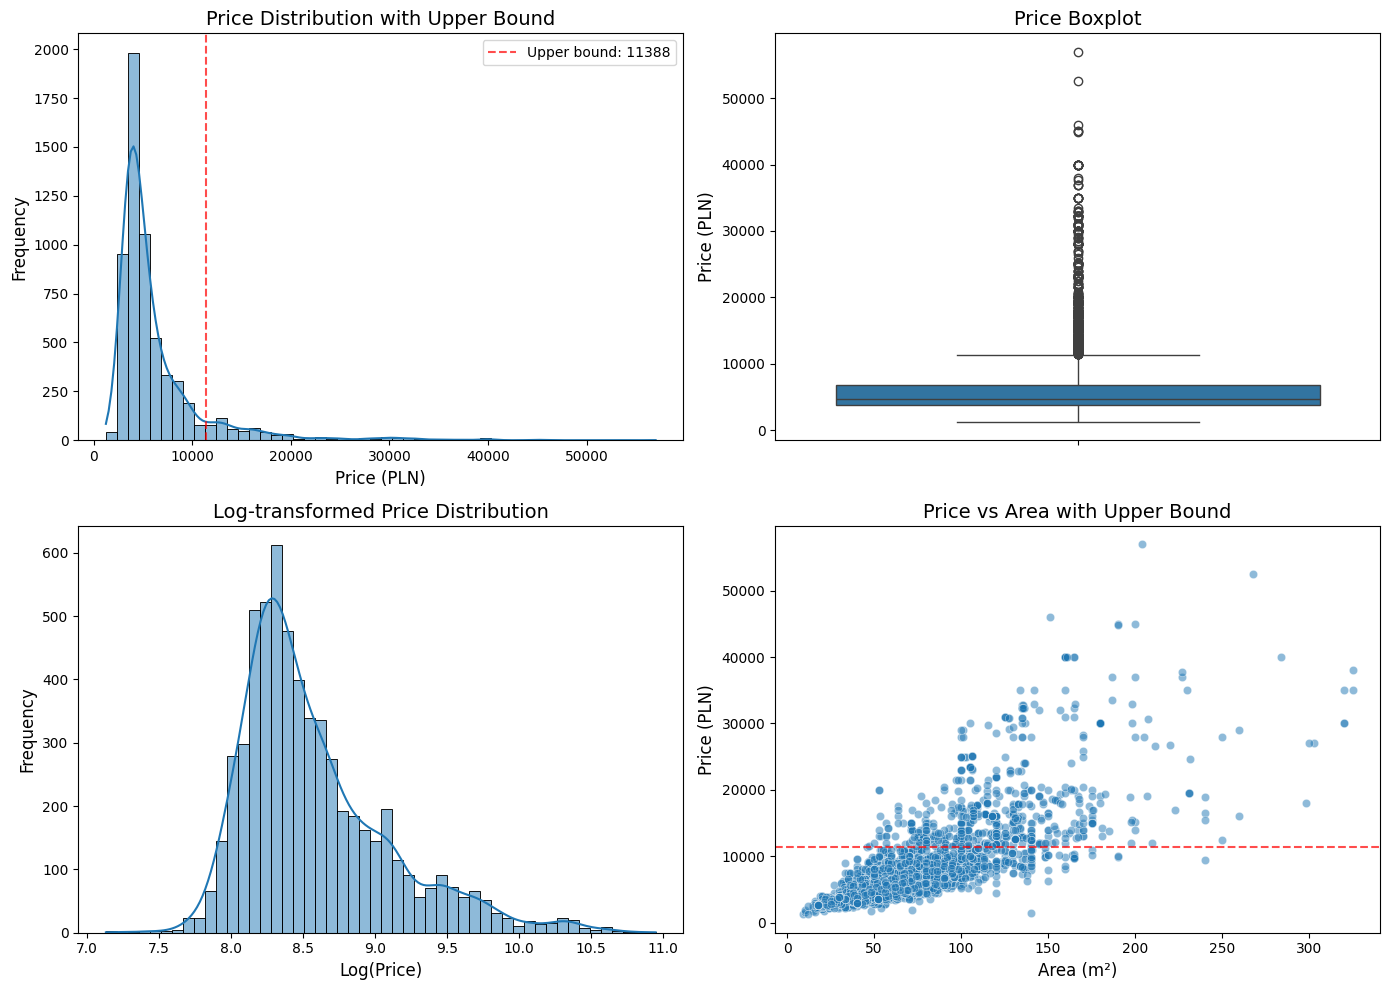


Top 10 highest price outliers:


total_price   area  rooms_num district_standardized
817       57000.0  204.0          4           Śródmieście
927       52600.0  268.0          5           Śródmieście
4009      46000.0  151.0          4           Śródmieście
5723      45000.0  200.0          5           Śródmieście
1158      45000.0  190.0          5           Śródmieście
4254      44850.0  190.0          5           Śródmieście
2162      40000.0  165.0          4           Śródmieście
2557      40000.0  160.0          4           Śródmieście
1259      40000.0  160.0          4           Śródmieście
5900      40000.0  161.0          4           Śródmieście


Feature comparison between outliers and non-outliers:


Outliers Mean  Non-outliers Mean     Ratio
area          127.728202          52.898767  2.414578
rooms_num       3.786555           2.243634  1.687688


District distribution of outliers:


Outliers (%)  Non-outliers (%)
district_standardized                                
Śródmieście               51.428571         14.966111
Mokotów                   21.680672         17.475728
Wola                      10.588235         12.969408
Wilanów                    9.243697          4.469683
Praga-Południe             2.016807          9.708738


Original vs. capped price statistics:


Original        Capped
count   6054.000000   6054.000000
mean    6290.730487   5624.171910
std     4882.566989   2619.102853
min     1250.000000   1250.000000
25%     3741.250000   3741.250000
50%     4636.500000   4636.500000
75%     6800.000000   6800.000000
90%    11004.000000  11004.000000
95%    15500.000000  11388.125000
99%    30000.000000  11388.125000
max    57000.000000  11388.125000


Impact of capping on total sum: 4,035,345.62 PLN (10.60%)

Log-transformed price statistics:


count    6054.000000
mean        8.579965
std         0.517872
min         7.130899
25%         8.227175
50%         8.441715
75%         8.824678
max        10.950807
Name: log_price, dtype: float64

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'total_price'

# Calculate IQR with the corrected data
Q1 = df[target_col].quantile(0.25)  # 3741.25
Q3 = df[target_col].quantile(0.75)  # 6800.00
IQR = Q3 - Q1  # 3058.75

# Define proper outlier thresholds
calculated_lower_bound = Q1 - 1.5 * IQR  # -846.88
lower_bound = max(1000, calculated_lower_bound)  # Use 1000 as minimum reasonable rent
upper_bound = Q3 + 1.5 * IQR  # 11388.12

print(f"Outlier analysis with corrected data:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

print(f"\nOutlier thresholds (1.5 IQR method):")
print(f"Calculated lower bound: {calculated_lower_bound:.2f} (invalid for prices)")
print(f"Adjusted lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Identify high outliers
high_outliers = df[df[target_col] > upper_bound]
high_outliers_count = len(high_outliers)
high_outliers_percent = high_outliers_count / len(df) * 100

print(f"\nNumber of high price outliers: {high_outliers_count} ({high_outliers_percent:.2f}% of the data)")
print(f"High outlier range: {upper_bound:.2f} to {df[target_col].max():.2f}")

# Create visualization of the price distribution
plt.figure(figsize=(14, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(df[target_col], kde=True, bins=50)
plt.axvline(x=upper_bound, color='r', linestyle='--', alpha=0.7, label=f'Upper bound: {upper_bound:.0f}')
plt.title('Price Distribution with Upper Bound', fontsize=14)
plt.xlabel('Price (PLN)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df[target_col])
plt.title('Price Boxplot', fontsize=14)
plt.ylabel('Price (PLN)', fontsize=12)

# Log-transformed price distribution - using log() instead of log1p()
plt.subplot(2, 2, 3)
sns.histplot(np.log(df[target_col]), kde=True, bins=50)
plt.title('Log-transformed Price Distribution', fontsize=14)
plt.xlabel('Log(Price)', fontsize=12)  # Changed label
plt.ylabel('Frequency', fontsize=12)

# Price vs area scatter plot
plt.subplot(2, 2, 4)
sns.scatterplot(x='area', y=target_col, data=df, alpha=0.5)
plt.axhline(y=upper_bound, color='r', linestyle='--', alpha=0.7)
plt.title('Price vs Area with Upper Bound', fontsize=14)
plt.xlabel('Area (m²)', fontsize=12)
plt.ylabel('Price (PLN)', fontsize=12)

plt.tight_layout()
plt.show()

# Analyze high outlier characteristics
if high_outliers_count > 0:
    # Sort outliers by price (descending)
    high_outliers = high_outliers.sort_values(by=target_col, ascending=False)
    
    print("\nTop 10 highest price outliers:")
    display_columns = [target_col, 'area', 'rooms_num']
    if 'district_standardized' in high_outliers.columns:
        display_columns.append('district_standardized')
    display(high_outliers[display_columns].head(10))
    
    # Compare outliers vs non-outliers
    non_outliers = df[df[target_col] <= upper_bound]
    
    # Key features comparison
    comparison_features = ['area', 'rooms_num']
    if all(col in df.columns for col in comparison_features):
        outlier_stats = high_outliers[comparison_features].mean()
        non_outlier_stats = non_outliers[comparison_features].mean()
        
        comparison = pd.DataFrame({
            'Outliers Mean': outlier_stats,
            'Non-outliers Mean': non_outlier_stats,
            'Ratio': outlier_stats / non_outlier_stats
        })
        
        print("\nFeature comparison between outliers and non-outliers:")
        display(comparison)
    
    # District distribution if available
    if 'district_standardized' in df.columns:
        print("\nDistrict distribution of outliers:")
        outlier_districts = high_outliers['district_standardized'].value_counts(normalize=True) * 100
        non_outlier_districts = non_outliers['district_standardized'].value_counts(normalize=True) * 100
        
        district_comparison = pd.DataFrame({
            'Outliers (%)': outlier_districts,
            'Non-outliers (%)': non_outlier_districts
        }).fillna(0).sort_values('Outliers (%)', ascending=False)
        
        display(district_comparison.head(5))

# Create a price-capped version
df['total_price_capped'] = df[target_col].clip(upper=upper_bound)

# Compare original vs capped statistics
print("\nOriginal vs. capped price statistics:")
comparison = pd.DataFrame({
    'Original': df[target_col].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]),
    'Capped': df['total_price_capped'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
})
display(comparison)

# Calculate the impact of capping on the total sum
original_sum = df[target_col].sum()
capped_sum = df['total_price_capped'].sum()
difference = original_sum - capped_sum
percent_difference = (difference / original_sum) * 100

print(f"\nImpact of capping on total sum: {difference:,.2f} PLN ({percent_difference:.2f}%)")

# Calculate log-transformed price for potential modeling - using log() instead of log1p()
df['log_price'] = np.log(df[target_col])
print("\nLog-transformed price statistics:")
display(df['log_price'].describe())

/Users/igorhebda/Desktop/PJA-EWD/projekt/3-2/.venv/lib/python3.13/site-packages/numpy/linalg/linalg.py:2030: RuntimeWarning: divide by zero encountered in matmul
  res = matmul(transpose(vt), multiply(s[..., newaxis], transpose(u)))
/Users/igorhebda/Desktop/PJA-EWD/projekt/3-2/.venv/lib/python3.13/site-packages/numpy/linalg/linalg.py:2030: RuntimeWarning: overflow encountered in matmul
  res = matmul(transpose(vt), multiply(s[..., newaxis], transpose(u)))
/Users/igorhebda/Desktop/PJA-EWD/projekt/3-2/.venv/lib/python3.13/site-packages/numpy/linalg/linalg.py:2030: RuntimeWarning: invalid value encountered in matmul
  res = matmul(transpose(vt), multiply(s[..., newaxis], transpose(u)))


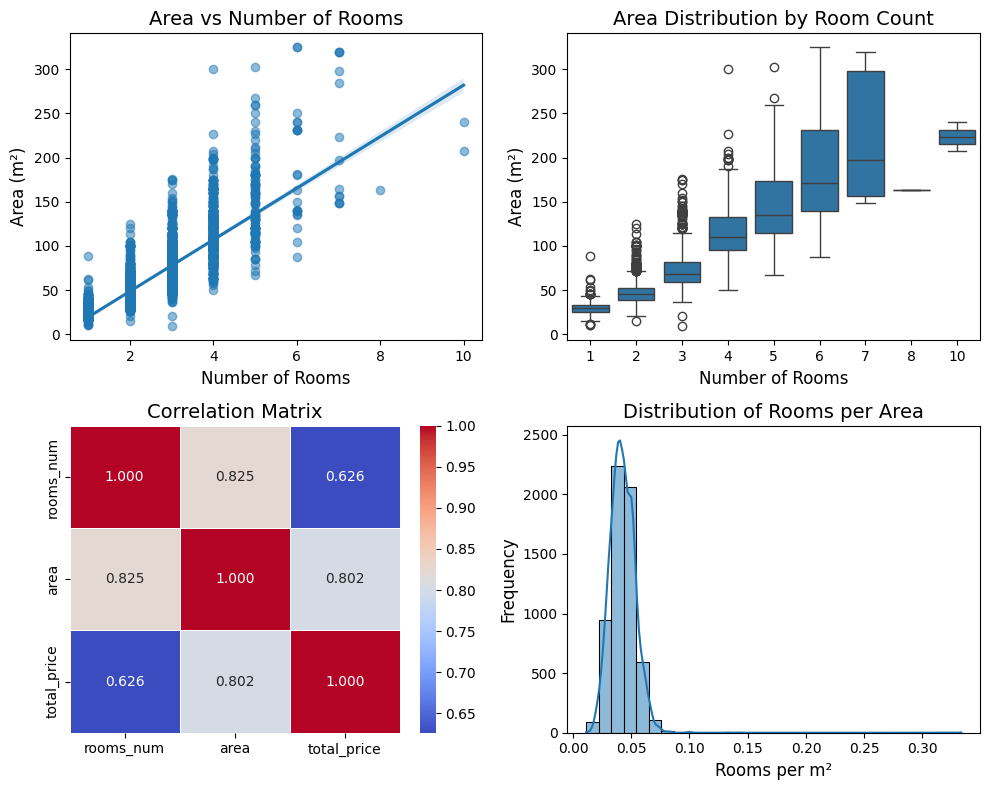

Statistics by room count:


area                            total_price         
                 mean  median        std count          mean   median
rooms_num                                                            
1           29.505972   30.00   6.654136   792   3234.070177   3107.0
2           46.400592   45.00  10.609113  2975   4702.347193   4170.0
3           73.247677   68.55  20.902594  1606   7326.077765   6300.0
4          115.673314  110.00  31.131634   525  13443.354286  11600.0
5          147.277119  135.00  44.492623   118  17093.957627  14000.5
6          187.386818  171.50  66.425756    22  16483.681818  15399.5
7          221.993846  197.00  74.732292    13  20772.769231  18000.0
8          163.370000  163.37        NaN     1  13900.000000  13900.0
10         223.700000  223.70  23.051681     2  23050.000000  23050.0

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize the relationship between rooms_num and area
plt.figure(figsize=(10, 8))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
sns.regplot(x='rooms_num', y='area', data=df, scatter_kws={'alpha':0.5})
plt.title('Area vs Number of Rooms', fontsize=14)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Area (m²)', fontsize=12)

# Box plot of area by room count
plt.subplot(2, 2, 2)
sns.boxplot(x='rooms_num', y='area', data=df)
plt.title('Area Distribution by Room Count', fontsize=14)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Area (m²)', fontsize=12)

# Correlation with price
plt.subplot(2, 2, 3)
correlations = df[['rooms_num', 'area', 'total_price']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)

# Histogram of rooms per area
plt.subplot(2, 2, 4)
df['rooms_per_area'] = df['rooms_num'] / df['area']
sns.histplot(df['rooms_per_area'], bins=30, kde=True)
plt.title('Distribution of Rooms per Area', fontsize=14)
plt.xlabel('Rooms per m²', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# 2. Calculate average area by room count
room_stats = df.groupby('rooms_num').agg({
    'area': ['mean', 'median', 'std', 'count'],
    'total_price': ['mean', 'median']
})

print("Statistics by room count:")
display(room_stats)



Amenity feature distribution:


Count  Percentage
furniture            4986       82.36
fridge               4561       75.34
lift                 4521       74.68
entryphone           4457       73.62
oven                 4149       68.53
washing_machine      4130       68.22
balcony              4023       66.45
garage               3748       61.91
dishwasher           3734       61.68
stove                3369       55.65
monitoring           3271       54.03
internet             2666       44.04
closed_area          2248       37.13
tv                   2180       36.01
anti_burglary_door   1847       30.51
cable-television     1803       29.78
non_smokers_only     1314       21.70
separate_kitchen     1308       21.61
air_conditioning     1155       19.08
basement              898       14.83
phone                 850       14.04
terrace               762       12.59
usable_room           602        9.94
alarm                 503        8.31
garden                347        5.73
roller_shutters       243        4.01

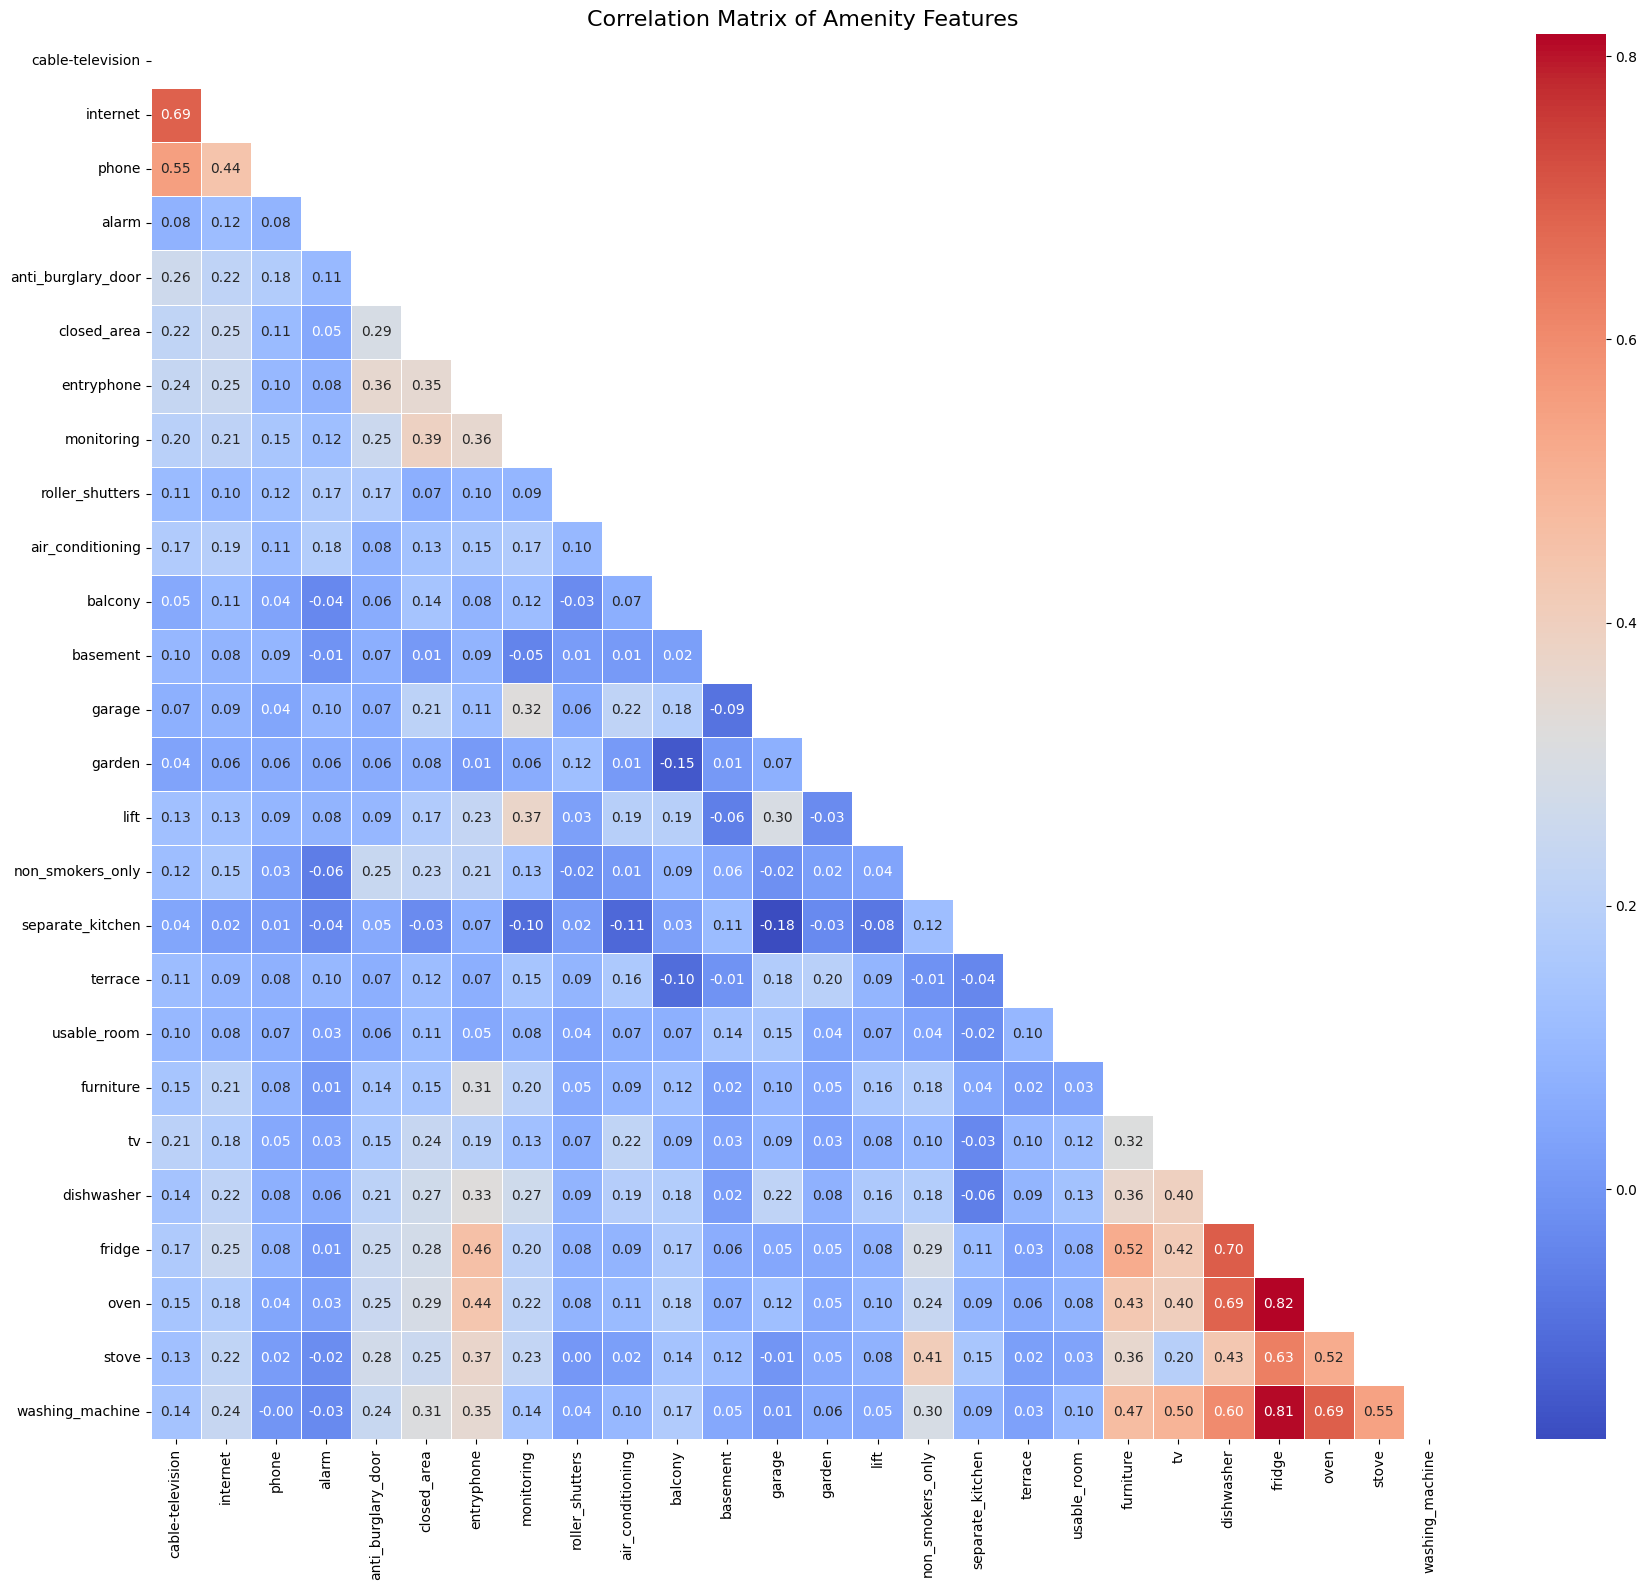


All correlated amenity pairs (sorted by correlation strength):


oven                fridge                0.815471
washing_machine     fridge                0.808619
fridge              dishwasher            0.699044
washing_machine     oven                  0.693314
internet            cable-television      0.690509
oven                dishwasher            0.685516
stove               fridge                0.628540
washing_machine     dishwasher            0.599572
phone               cable-television      0.551945
washing_machine     stove                 0.547472
stove               oven                  0.518453
fridge              furniture             0.518379
washing_machine     tv                    0.496488
                    furniture             0.469608
fridge              entryphone            0.456666
phone               internet              0.444105
oven                entryphone            0.436240
stove               dishwasher            0.432946
oven                furniture             0.429198
fridge              tv         


Correlation with price:


total_price           1.000000
air_conditioning      0.313747
garage                0.216453
alarm                 0.210114
terrace               0.209897
lift                  0.108523
usable_room           0.098148
monitoring            0.069660
phone                 0.055012
roller_shutters       0.047814
cable-television      0.043293
internet              0.027617
tv                    0.022649
dishwasher            0.004079
garden                0.002102
closed_area          -0.000530
basement             -0.017729
entryphone           -0.039976
anti_burglary_door   -0.049824
balcony              -0.072602
oven                 -0.098876
separate_kitchen     -0.135514
washing_machine      -0.165029
fridge               -0.167313
furniture            -0.168722
non_smokers_only     -0.171550
stove                -0.225026
Name: total_price, dtype: float64


Price impact of amenities:


With Amenity  Without Amenity   Difference  Pct Difference
air_conditioning     9445.401636      5546.977644  3898.423992       70.280146
alarm                9698.487078      5981.938997  3716.548081       62.129488
terrace              8991.275591      5901.876487  3089.399103       52.346048
garage               7119.638474      4943.485416  2176.153058       44.020623
usable_room          7732.763937      6131.503756  1601.260180       26.115293
lift                 6599.252875      5380.861135  1218.391740       22.643062
roller_shutters      7432.259259      6242.994901  1189.264358       19.049581
phone                6955.280000      6182.185698   773.094302       12.505194
monitoring           6604.429890      5922.023787   682.406103       11.523191
cable-television     6615.280028      6153.077506   462.202521        7.511729
internet             6442.728297      6171.124182   271.604115        4.401210
tv                   6438.134353      6207.782519   230.351834        3.710694
garden               6332.344063      6288.200277    44.143787        0.702010
dishwasher           6306.428862      6265.464224    40.964638        0.653816
closed_area          6287.363421      6292.719233    -5.355812       -0.085111
basement             6083.327149      6326.853101  -243.525952       -3.849085
entryphone           6173.904335      6616.775673  -442.871338       -6.693159
anti_burglary_door   5923.614846      6451.905336  -528.290491       -8.188131
balcony              6038.881427      6789.592511  -750.711084      -11.056791
oven                 5963.631326      7003.137008 -1039.505682      -14.843429
washing_machine      5740.811228      7471.170478 -1730.359251      -23.160484
separate_kitchen     5030.484419      6638.054941 -1607.570522      -24.217493
fridge               5823.380919      7718.447421 -1895.066503      -24.552431
furniture            5909.495917      8070.539073 -2161.043156      -26.776937
stove                5309.960039      7521.350838 -2211.390799      -29.401511
non_smokers_only     4700.009414      6731.702532 -2031.693118      -30.180970

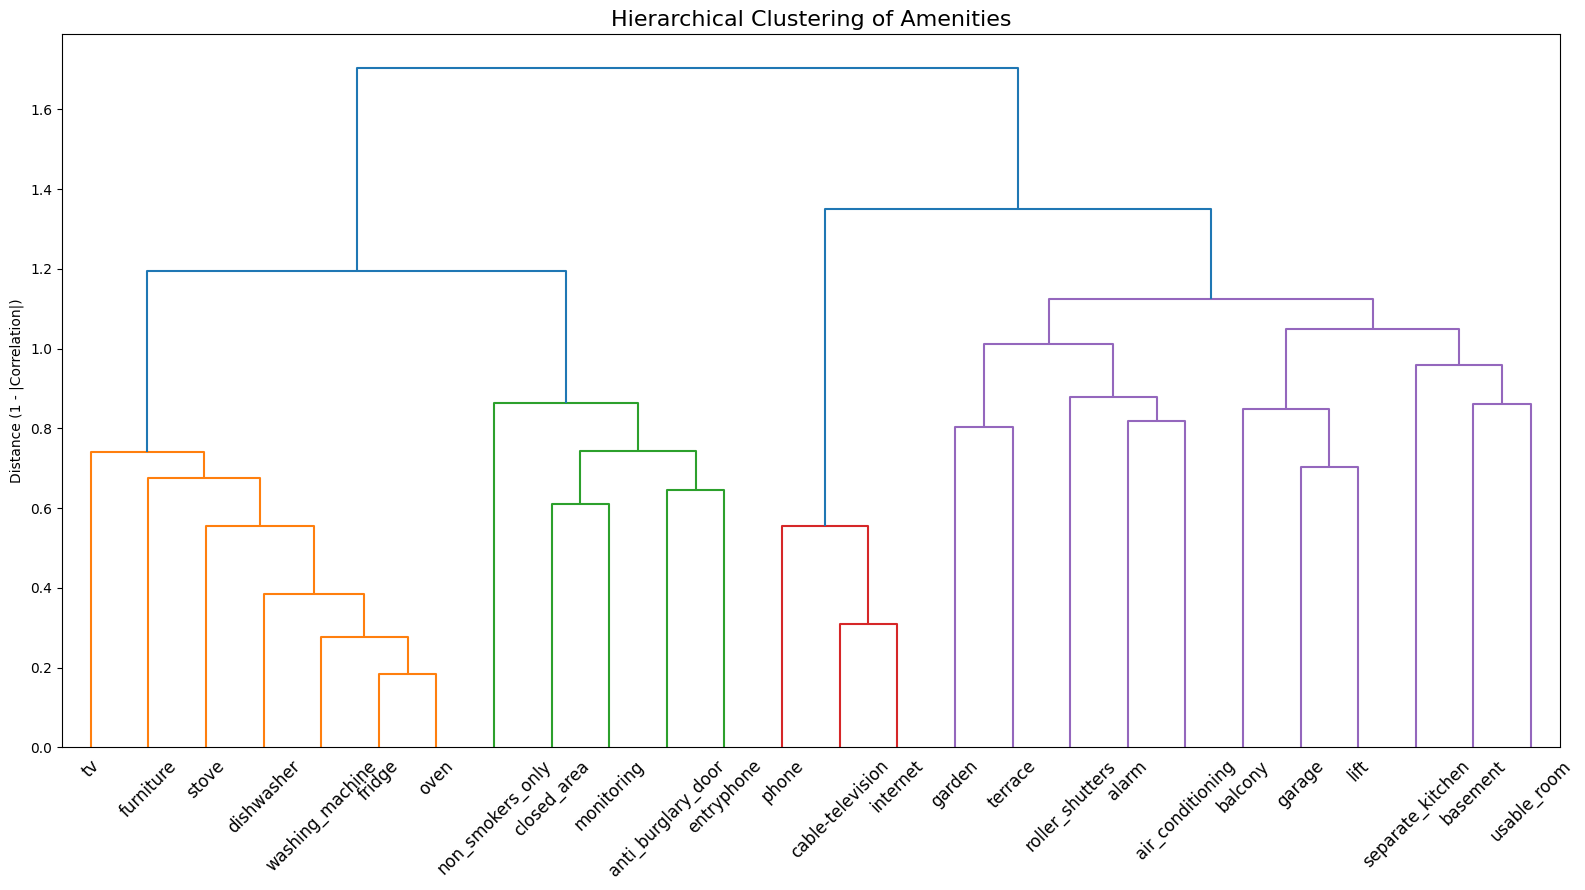


Suggested amenity groupings based on correlation patterns:
Group 1: washing_machine, oven, fridge, dishwasher, tv, furniture, stove
  Correlation with price: -0.146
  Average number of amenities in this group: 4.48/7

Group 2: anti_burglary_door, closed_area, entryphone, monitoring, non_smokers_only
  Correlation with price: -0.051
  Average number of amenities in this group: 2.17/5

Group 3: cable-television, phone, internet
  Correlation with price: 0.048
  Average number of amenities in this group: 0.88/3

Group 4: garden, terrace, air_conditioning, roller_shutters, alarm
  Correlation with price: 0.328
  Average number of amenities in this group: 0.50/5

Group 5: lift, balcony, garage
  Correlation with price: 0.122
  Average number of amenities in this group: 2.03/3

Group 6: separate_kitchen, usable_room, basement
  Correlation with price: -0.049
  Average number of amenities in this group: 0.46/3


Distribution of kitchen appliances across clusters:
Cluster 1: 5 kitchen applian

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display

# Define the list of amenity features, including kitchen appliances
amenity_features = [
    'cable-television', 'internet', 'phone', 
    'alarm', 'anti_burglary_door', 'closed_area', 'entryphone', 'monitoring', 'roller_shutters',
    'air_conditioning', 'balcony', 'basement', 'garage', 'garden', 'lift',
    'non_smokers_only', 'separate_kitchen', 'terrace', 'usable_room', 'furniture', 'tv',
    # Added kitchen appliance columns
    'dishwasher', 'fridge', 'oven', 'stove', 'washing_machine'
]

# Make sure all these columns exist in the dataframe
existing_amenities = [col for col in amenity_features if col in df.columns]
if len(existing_amenities) < len(amenity_features):
    missing = set(amenity_features) - set(existing_amenities)
    print(f"Warning: The following amenities were not found in the dataframe: {missing}")
    amenity_features = existing_amenities

# 1. Distribution of amenity features
# Calculate the percentage of apartments with each amenity
amenity_counts = df[amenity_features].sum().sort_values(ascending=False)
amenity_percentages = (amenity_counts / len(df) * 100).round(2)

# Create a summary dataframe
amenity_summary = pd.DataFrame({
    'Count': amenity_counts,
    'Percentage': amenity_percentages
})

print("Amenity feature distribution:")
display(amenity_summary)

# 2. Correlation matrix among amenity features
amenity_corr = df[amenity_features].corr()

# Create a heatmap of correlations
plt.figure(figsize=(18, 16))  # Made larger to accommodate more features
mask = np.triu(np.ones_like(amenity_corr, dtype=bool))
sns.heatmap(
    amenity_corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',
    mask=mask,
    linewidths=0.5
)
plt.title('Correlation Matrix of Amenity Features', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Identify all correlated amenity pairs
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(amenity_corr, dtype=bool))

# Get the correlations excluding self-correlations
corr_pairs = amenity_corr.abs().where(~mask).stack().sort_values(ascending=False)

# Display all correlated pairs
print("\nAll correlated amenity pairs (sorted by correlation strength):")
display(corr_pairs)

# 4. Relationship with price
# Calculate correlation with price
price_corr = df[amenity_features + ['total_price']].corr()['total_price'].sort_values(ascending=False)

print("\nCorrelation with price:")
display(price_corr)

# 5. Compare average prices with/without each amenity
price_impact = pd.DataFrame(index=amenity_features)

for feature in amenity_features:
    if feature in df.columns:
        # Average price with amenity
        with_amenity = df[df[feature] == 1]['total_price'].mean()
        
        # Average price without amenity
        without_amenity = df[df[feature] == 0]['total_price'].mean()
        
        # Absolute and percentage difference
        diff = with_amenity - without_amenity
        pct_diff = (diff / without_amenity) * 100
        
        price_impact.loc[feature, 'With Amenity'] = with_amenity
        price_impact.loc[feature, 'Without Amenity'] = without_amenity
        price_impact.loc[feature, 'Difference'] = diff
        price_impact.loc[feature, 'Pct Difference'] = pct_diff

price_impact = price_impact.sort_values('Pct Difference', ascending=False)

print("\nPrice impact of amenities:")
display(price_impact)

# 6. Check for potential groupings based on correlation patterns
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Convert correlation matrix to distance matrix
# (higher correlation = lower distance)
dissimilarity = 1 - np.abs(amenity_corr)
distance_matrix = squareform(dissimilarity)

# Perform hierarchical clustering
linkage = hierarchy.linkage(distance_matrix, method='ward')

# Plot dendrogram to visualize amenity clusters
plt.figure(figsize=(16, 9))  # Made larger to accommodate more features
dendro = hierarchy.dendrogram(
    linkage,
    labels=amenity_features,
    leaf_font_size=12,
    orientation='top'
)
plt.title('Hierarchical Clustering of Amenities', fontsize=16)
plt.ylabel('Distance (1 - |Correlation|)')
plt.tight_layout()
plt.show()

# 7. Create suggested feature groupings based on the hierarchical clustering
# Number of clusters (adjust based on the dendrogram)
n_clusters = 6  # Increased to 6 to potentially give kitchen appliances their own group
clusters = hierarchy.fcluster(linkage, n_clusters, criterion='maxclust')

# Create a dataframe to show the clusters
cluster_df = pd.DataFrame({
    'Amenity': amenity_features,
    'Cluster': clusters
})

# Sort by cluster
cluster_df = cluster_df.sort_values('Cluster')

print("\nSuggested amenity groupings based on correlation patterns:")
for cluster_num in range(1, n_clusters + 1):
    cluster_amenities = cluster_df[cluster_df['Cluster'] == cluster_num]['Amenity'].tolist()
    print(f"Group {cluster_num}: {', '.join(cluster_amenities)}")
    
    # Create group score
    group_name = f'amenity_group_{cluster_num}'
    df[group_name] = df[cluster_amenities].sum(axis=1)
    
    # Calculate correlation with price
    group_price_corr = df[[group_name, 'total_price']].corr().iloc[0, 1]
    print(f"  Correlation with price: {group_price_corr:.3f}")
    print(f"  Average number of amenities in this group: {df[group_name].mean():.2f}/{len(cluster_amenities)}")
    print()

# 8. Check if kitchen appliances form their own cluster or where they fall
kitchen_appliance_columns = ['dishwasher', 'fridge', 'oven', 'stove', 'washing_machine']
existing_kitchen_columns = [col for col in kitchen_appliance_columns if col in amenity_features]

if existing_kitchen_columns:
    kitchen_clusters = cluster_df[cluster_df['Amenity'].isin(existing_kitchen_columns)]['Cluster'].value_counts()
    
    print("\nDistribution of kitchen appliances across clusters:")
    for cluster, count in kitchen_clusters.items():
        cluster_members = cluster_df[(cluster_df['Cluster'] == cluster) & 
                                    (cluster_df['Amenity'].isin(existing_kitchen_columns))]['Amenity'].tolist()
        print(f"Cluster {cluster}: {count} kitchen appliances - {', '.join(cluster_members)}")
    
    # Create a dedicated kitchen appliances score regardless of clustering results
    df['kitchen_appliances_score'] = df[existing_kitchen_columns].sum(axis=1)
    kitchen_price_corr = df[['kitchen_appliances_score', 'total_price']].corr().iloc[0, 1]
    
    print(f"\nCreated kitchen_appliances_score (correlation with price: {kitchen_price_corr:.3f})")
    
    # Distribution of the kitchen appliances score
    value_counts = df['kitchen_appliances_score'].value_counts().sort_index()
    print("\nDistribution of kitchen_appliances_score:")
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")

Correlation with price for grouped amenity features:
kitchen_furniture_score: -0.146
security_score: -0.051
tech_score: 0.048
premium_amenities_score: 0.328
infrastructure_score: 0.122
interior_score: -0.049
total_amenities_score: -0.008
has_premium_amenities: 0.288
kitchen_furniture_ratio: -0.146
security_ratio: -0.051
tech_ratio: 0.048
premium_ratio: 0.328
infrastructure_ratio: 0.122
interior_ratio: -0.049
total_amenities_ratio: -0.008

Weighted score correlation with price: 0.382

Features sorted by correlation strength (absolute value):
weighted_amenities_score: 0.382
premium_amenities_score: 0.328
premium_ratio: 0.328
has_premium_amenities: 0.288
kitchen_furniture_ratio: -0.146
kitchen_furniture_score: -0.146
infrastructure_score: 0.122
infrastructure_ratio: 0.122
security_score: -0.051
security_ratio: -0.051
interior_ratio: -0.049
interior_score: -0.049
tech_ratio: 0.048
tech_score: 0.048
total_amenities_ratio: -0.008
total_amenities_score: -0.008


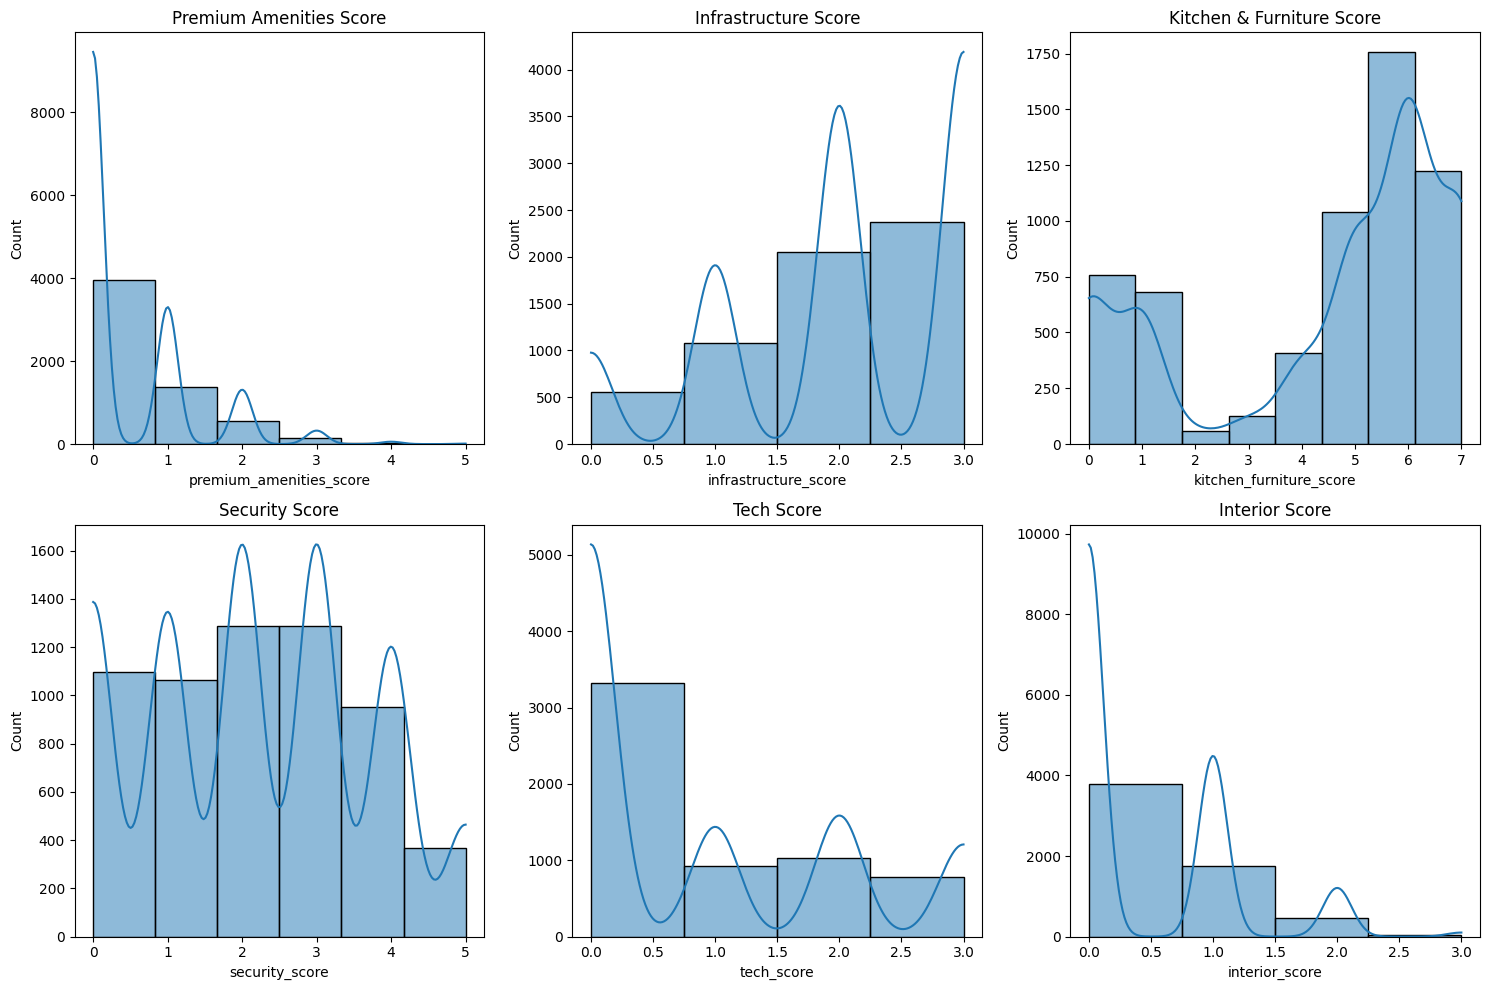

In [296]:
# Create amenity groups based on the hierarchical clustering results

# Group 1: Kitchen/Furniture Amenities (correlation with price: -0.146)
kitchen_furniture_amenities = ['washing_machine', 'oven', 'fridge', 'dishwasher', 'tv', 'furniture', 'stove']
df['kitchen_furniture_score'] = df[kitchen_furniture_amenities].sum(axis=1)

# Group 2: Security Features (correlation with price: -0.051)
security_amenities = ['anti_burglary_door', 'closed_area', 'entryphone', 'monitoring', 'non_smokers_only']
df['security_score'] = df[security_amenities].sum(axis=1)

# Group 3: Tech/Media (correlation with price: 0.048)
tech_amenities = ['cable-television', 'phone', 'internet']
df['tech_score'] = df[tech_amenities].sum(axis=1)

# Group 4: Premium Features (highest correlation with price: 0.328)
premium_amenities = ['garden', 'terrace', 'air_conditioning', 'roller_shutters', 'alarm']
df['premium_amenities_score'] = df[premium_amenities].sum(axis=1)

# Group 5: Building Infrastructure (correlation with price: 0.122)
infrastructure_amenities = ['lift', 'balcony', 'garage']
df['infrastructure_score'] = df[infrastructure_amenities].sum(axis=1)

# Group 6: Basic Interior Features (correlation with price: -0.049)
interior_amenities = ['separate_kitchen', 'usable_room', 'basement']
df['interior_score'] = df[interior_amenities].sum(axis=1)

# Create a normalized version of each score (as a ratio of possible maximum)
df['kitchen_furniture_ratio'] = df['kitchen_furniture_score'] / len(kitchen_furniture_amenities)
df['security_ratio'] = df['security_score'] / len(security_amenities)
df['tech_ratio'] = df['tech_score'] / len(tech_amenities)
df['premium_ratio'] = df['premium_amenities_score'] / len(premium_amenities)
df['infrastructure_ratio'] = df['infrastructure_score'] / len(infrastructure_amenities)
df['interior_ratio'] = df['interior_score'] / len(interior_amenities)

# Total amenities score
all_amenities = (kitchen_furniture_amenities + security_amenities + tech_amenities + 
                premium_amenities + infrastructure_amenities + interior_amenities)
df['total_amenities_score'] = df[all_amenities].sum(axis=1)
df['total_amenities_ratio'] = df['total_amenities_score'] / len(all_amenities)

# Create a has_premium indicator (since Group 4 has highest correlation)
df['has_premium_amenities'] = (df['premium_amenities_score'] >= 2).astype(int)

# Print correlation of new features with price
new_features = [
    'kitchen_furniture_score', 'security_score', 'tech_score',
    'premium_amenities_score', 'infrastructure_score', 'interior_score',
    'total_amenities_score', 'has_premium_amenities',
    'kitchen_furniture_ratio', 'security_ratio', 'tech_ratio',
    'premium_ratio', 'infrastructure_ratio', 'interior_ratio',
    'total_amenities_ratio'
]

print("Correlation with price for grouped amenity features:")
correlations = {}
for feature in new_features:
    corr = df[[feature, 'total_price']].corr().iloc[0, 1]
    correlations[feature] = corr
    print(f"{feature}: {corr:.3f}")

# Check if the combined score has better predictive power than individual groups
# Create a weighted score based on correlation strengths
df['weighted_amenities_score'] = (
    -0.146 * df['kitchen_furniture_ratio'] +
    -0.051 * df['security_ratio'] + 
    0.048 * df['tech_ratio'] + 
    0.328 * df['premium_ratio'] + 
    0.122 * df['infrastructure_ratio'] - 
    0.049 * df['interior_ratio']
)

weighted_corr = df[['weighted_amenities_score', 'total_price']].corr().iloc[0, 1]
print(f"\nWeighted score correlation with price: {weighted_corr:.3f}")
correlations['weighted_amenities_score'] = weighted_corr

# Sort features by absolute correlation with price
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("\nFeatures sorted by correlation strength (absolute value):")
for feature, corr in sorted_correlations:
    print(f"{feature}: {corr:.3f}")

# Plot the distribution of the grouped scores
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['premium_amenities_score'], kde=True, bins=len(premium_amenities)+1)
plt.title('Premium Amenities Score')

plt.subplot(2, 3, 2)
sns.histplot(df['infrastructure_score'], kde=True, bins=len(infrastructure_amenities)+1)
plt.title('Infrastructure Score')

plt.subplot(2, 3, 3)
sns.histplot(df['kitchen_furniture_score'], kde=True, bins=len(kitchen_furniture_amenities)+1)
plt.title('Kitchen & Furniture Score')

plt.subplot(2, 3, 4)
sns.histplot(df['security_score'], kde=True, bins=len(security_amenities)+1)
plt.title('Security Score')

plt.subplot(2, 3, 5)
sns.histplot(df['tech_score'], kde=True, bins=len(tech_amenities)+1)
plt.title('Tech Score')

plt.subplot(2, 3, 6)
sns.histplot(df['interior_score'], kde=True, bins=len(interior_amenities)+1)
plt.title('Interior Score')

plt.tight_layout()
plt.show()

In [297]:
# Define all the original amenity features to drop
amenity_features_to_drop = [
    'washing_machine', 'oven', 'fridge', 'dishwasher', 'tv', 'furniture', 'stove',
    'terrace', 'alarm', 'garden', 'roller_shutters', 'air_conditioning',  # Group 1
    'balcony', 'lift', 'garage',  # Group 2
    'usable_room', 'separate_kitchen', 'basement',  # Group 3
    'cable-television', 'phone', 'internet',  # Group 4
    'monitoring', 'entryphone', 'closed_area', 'non_smokers_only', 
    'anti_burglary_door', 'furniture', 'tv'  # Group 5
]

# Check which columns exist in the dataframe
existing_columns = [col for col in amenity_features_to_drop if col in df.columns]
missing_columns = [col for col in amenity_features_to_drop if col not in df.columns]

if missing_columns:
    print(f"Warning: These columns were not found in the dataframe: {missing_columns}")

# Store the original shape
original_shape = df.shape

# Drop the individual amenity columns
if existing_columns:
    df = df.drop(columns=existing_columns)
    print(f"Dropped {len(existing_columns)} individual amenity columns")
else:
    print("No amenity columns to drop")

# Print the new shape
print(f"DataFrame shape changed from {original_shape} to {df.shape}")

# Let's verify the grouped columns are still there
grouped_columns = [
    'premium_amenities_score', 'infrastructure_score', 'interior_score', 
    'tech_score', 'general_amenities_score', 'total_amenities_score',
    'premium_ratio', 'infrastructure_ratio', 'interior_ratio', 
    'tech_ratio', 'general_ratio', 'total_amenities_ratio',
    'has_premium_amenities', 'weighted_amenities_score'
]

# Check which grouped columns exist
existing_grouped = [col for col in grouped_columns if col in df.columns]
print(f"\nRetained {len(existing_grouped)} grouped amenity columns:")
for col in existing_grouped:
    print(f"- {col}")

# Update the int64_columns list if you're keeping track of it
if 'int64_columns' in globals():
    # Remove the dropped columns
    int64_columns = [col for col in int64_columns if col not in amenity_features_to_drop]
    
    # Add the new integer columns 
    int_grouped_columns = ['premium_amenities_score', 'infrastructure_score', 'interior_score', 
                          'tech_score', 'general_amenities_score', 'total_amenities_score',
                          'has_premium_amenities']
    
    for col in int_grouped_columns:
        if col in df.columns and col not in int64_columns:
            int64_columns.append(col)
    
    print(f"\nUpdated int64_columns list now has {len(int64_columns)} columns")

# Print summary statistics for the new columns
print("\nSummary statistics for grouped amenity features:")
if existing_grouped:
    display(df[existing_grouped].describe())

Dropped 28 individual amenity columns
DataFrame shape changed from (6054, 134) to (6054, 108)

Retained 12 grouped amenity columns:
- premium_amenities_score
- infrastructure_score
- interior_score
- tech_score
- total_amenities_score
- premium_ratio
- infrastructure_ratio
- interior_ratio
- tech_ratio
- total_amenities_ratio
- has_premium_amenities
- weighted_amenities_score

Updated int64_columns list now has 65 columns

Summary statistics for grouped amenity features:


premium_amenities_score  infrastructure_score  interior_score  \
count              6054.000000           6054.000000     6054.000000   
mean                  0.497192              2.030393        0.463826   
std                   0.793940              0.967027        0.665595   
min                   0.000000              0.000000        0.000000   
25%                   0.000000              1.000000        0.000000   
50%                   0.000000              2.000000        0.000000   
75%                   1.000000              3.000000        1.000000   
max                   5.000000              3.000000        3.000000   

        tech_score  total_amenities_score  premium_ratio  \
count  6054.000000            6054.000000    6054.000000   
mean      0.878593              10.517839       0.099438   
std       1.103871               4.722772       0.158788   
min       0.000000               0.000000       0.000000   
25%       0.000000               7.000000       0.000000   
50%       0.000000              11.000000       0.000000   
75%       2.000000              14.000000       0.200000   
max       3.000000              22.000000       1.000000   

       infrastructure_ratio  interior_ratio   tech_ratio  \
count           6054.000000     6054.000000  6054.000000   
mean               0.676798        0.154609     0.292864   
std                0.322342        0.221865     0.367957   
min                0.000000        0.000000     0.000000   
25%                0.333333        0.000000     0.000000   
50%                0.666667        0.000000     0.000000   
75%                1.000000        0.333333     0.666667   
max                1.000000        1.000000     1.000000   

       total_amenities_ratio  has_premium_amenities  weighted_amenities_score  
count            6054.000000            6054.000000               6054.000000  
mean                0.404532               0.117939                  0.006138  
std                 0.181645               0.322562                  0.082565  
min                 0.000000               0.000000                 -0.193267  
25%                 0.269231               0.000000                 -0.053524  
50%                 0.423077               0.000000                 -0.002200  
75%                 0.538462               0.000000                  0.060345  
max                 0.846154               1.000000                  0.367638

In [298]:
df = df.drop(columns=['total_price_capped'])

In [299]:
# Drop the generic amenity group columns
generic_group_columns = [
    'amenity_group_1', 'amenity_group_2', 'amenity_group_3', 
    'amenity_group_4', 'amenity_group_5', 'amenity_group_6'
]

# Check which ones exist in the dataframe
existing_columns = [col for col in generic_group_columns if col in df.columns]

if existing_columns:
    # Drop the columns
    df = df.drop(columns=existing_columns)
    print(f"Dropped {len(existing_columns)} redundant generic amenity group columns")
else:
    print("No generic amenity group columns found to drop")

# Print the new shape
print(f"New dataframe shape: {df.shape}")

Dropped 6 redundant generic amenity group columns
New dataframe shape: (6054, 101)


In [300]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_info_columns', 10000)  # Ensures no cutoff in df.info()
from io import StringIO


buffer = StringIO()
df.info(verbose=True, show_counts=True, buf=buffer)
info_str = buffer.getvalue()
print(info_str)  # Now you'll see all columns including column 20
with open("df_info.txt", "w") as f:
    df.info(verbose=True, show_counts=True, buf=f)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6054 entries, 0 to 6053
Data columns (total 101 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    url                               6054 non-null   object 
 1    street                            6054 non-null   object 
 2    latitude                          6054 non-null   float64
 3    longitude                         6054 non-null   float64
 4    area                              6054 non-null   float64
 5    rooms_num                         6054 non-null   int64  
 6    building_floors_num               6054 non-null   float64
 7    deposit                           6054 non-null   float64
 8    build_year                        6054 non-null   float64
 9    total_price                       6054 non-null   float64
 10   price_per_sqm                     6054 non-null   float64
 11   district_standardized             6054 non-null   obje

url  \
0    https://www.otodom.pl/pl/oferta/wyjatkowy-apartament-3-pokoje-smart-home-parking-ochrona-24-7-ID4vgjw   
1                     https://www.otodom.pl/pl/oferta/3-pokoje-3m-wys-2-balkony-miejsce-parkingowe-ID48hN6   
2                                   https://www.otodom.pl/pl/oferta/2-pokojowe-mieszkanie-z-loggia-ID4vg2M   
3  https://www.otodom.pl/pl/oferta/mieszkanie-3-pokojowe-w-falenicy-z-garazem-i-komorka-lokatorska-ID4v8ta   
4                    https://www.otodom.pl/pl/oferta/3-pokojowy-apartament-klasy-premium-kasprzaka-ID4vh47   
5                         https://www.otodom.pl/pl/oferta/bliska-wola-towers-3-pokoje-klimatyzacja-ID4vh46   
6                            https://www.otodom.pl/pl/oferta/nowe-komfortowe-ciche-2-pokoje-goclaw-ID4wrkH   
7                             https://www.otodom.pl/pl/oferta/bez-prowizji-dwa-pokoje-pet-friendly-ID4venE   
8       https://www.otodom.pl/pl/oferta/3-pokojowe-300-m-od-metra-targowek-mieszkaniowy-umeblowane-ID4vh3p   
9                         https://www.otodom.pl/pl/oferta/4-pokojowy-apartament-ul-grzybowska-wola-ID4wIcc   

                           street   latitude  longitude   area  rooms_num  \
0  ul. Juliana Ursyna Niemcewicza  52.221154  20.983158   70.0          3   
1                    ul. Kłobucka  52.163581  20.992267   63.0          3   
2                      ul. Wolska  52.229725  20.952157   33.0          2   
3                  ul. Grzybowska  52.157487  21.199831   56.0          3   
4           ul. Marcina Kasprzaka  52.227970  20.958860   65.0          3   
5           ul. Marcina Kasprzaka  52.227970  20.958860   65.0          3   
6  ul. Jana Nowaka-Jeziorańskiego  52.230828  21.097653   44.0          2   
7                    ul. Szczęsna  52.209580  20.929948   49.7          2   
8                  ul. Myszkowska  52.268674  21.055592   60.0          3   
9                  ul. Grzybowska  52.237090  20.999720  200.0          4   

   building_floors_num  deposit  build_year  total_price  price_per_sqm  \
0                  4.0  17000.0      2018.0       9750.0     139.285714   
1                  8.0   6000.0      2015.0       5700.0      90.476190   
2                 16.0   3400.0      2021.0       3900.0     118.181818   
3                  3.0   5000.0      2023.0       4300.0      76.785714   
4                 17.0  18000.0      2010.0       9500.0     146.153846   
5                 24.0   7500.0      2010.0       7500.0     115.384615   
6                  8.0   4500.0      2024.0       3880.0      88.181818   
7                  2.0   4500.0      2010.0       4164.0      83.782696   
8                  6.0   3000.0      2010.0       4200.0      70.000000   
9                 10.0  14000.0      2004.0      15200.0      76.000000   

  district_standardized  district_Bemowo  district_Białołęka  \
0                Ochota                0                   0   
1               Ursynów                0                   0   
2                  Wola                0                   0   
3                 Other                0                   0   
4                  Wola                0                   0   
5                  Wola                0                   0   
6        Praga-Południe                0                   0   
7                Włochy                0                   0   
8              Targówek                0                   0   
9                  Wola                0                   0   

   district_Bielany  district_Mokotów  district_Ochota  district_Other  \
0                 0                 0                1               0   
1                 0                 0                0               0   
2                 0                 0                0               0   
3                 0                 0                0               0   
4                 0                 0                0               0   
5                 0                 0                0               

In [301]:
df.to_csv('clean2.csv', index=False)